# Universidad Politécnica Salesiana 
### Nombre: Fernando Sanchez 
### Materia: Sistemas Expertos
### Prueba 2
### Fecha: 31/01/202
### Tema:
     Basados en casos.
     
    •	Diseñe y desarrolle un algoritmo Knn en Neo4j para:
        ◦	Fila B - 1: Este es un conjunto de datos de empleados en una empresa y el resultado es estudiar   
        sobre la deserción de los empleados, para ello se debe  descargar los datos del siguiente link: 
        http://smalldatabrains.com/wp-content/uploads/2018/03/data.csv [2].
    
### Importar la API pandas para la manipulación y el análisis de datos para procesar los datos del documento excel "data.csv"
#### import  pandas

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data.csv",sep=';')
lista = [list(row) for row in df.values]
### Imprimir el tamaño de la lista (datos obtenidos del archivo data.csv)
print("Longitud de la lista: "+str(len(lista)))

Longitud de la lista: 14999


# Importar la API py2neo
    para el ingreso de los datos que se encuentran dentro de la lista
# Conexión con Neo4j
    Configure la URL de conexión con la base de datos de Ne04j:
   ### graph = Graph("bolt://localhost:7687", aut="neo4j", password="Prueba2", secure=False)   

In [3]:
#IMPORTAR py2neo
from py2neo import Node, Relationship, Graph


# connect to authenticated graph database
graph = Graph("bolt://localhost:7687", aut="neo4j", password="Prueba2", secure=False)   

In [4]:
print(lista)

[[0.38, 0.53, 2.0, 157.0, 3.0, 0.0, 0.0, 1.0], [0.8, 0.86, 5.0, 262.0, 6.0, 0.0, 0.0, 1.0], [0.11, 0.88, 7.0, 272.0, 4.0, 0.0, 0.0, 1.0], [0.72, 0.87, 5.0, 223.0, 5.0, 0.0, 0.0, 1.0], [0.37, 0.52, 2.0, 159.0, 3.0, 0.0, 0.0, 1.0], [0.41, 0.5, 2.0, 153.0, 3.0, 0.0, 0.0, 1.0], [0.1, 0.77, 6.0, 247.0, 4.0, 0.0, 0.0, 1.0], [0.92, 0.85, 5.0, 259.0, 5.0, 0.0, 0.0, 1.0], [0.89, 1.0, 5.0, 224.0, 5.0, 0.0, 0.0, 1.0], [0.42, 0.53, 2.0, 142.0, 3.0, 0.0, 0.0, 1.0], [0.45, 0.54, 2.0, 135.0, 3.0, 0.0, 0.0, 1.0], [0.11, 0.81, 6.0, 305.0, 4.0, 0.0, 0.0, 1.0], [0.84, 0.92, 4.0, 234.0, 5.0, 0.0, 0.0, 1.0], [0.41, 0.55, 2.0, 148.0, 3.0, 0.0, 0.0, 1.0], [0.36, 0.56, 2.0, 137.0, 3.0, 0.0, 0.0, 1.0], [0.38, 0.54, 2.0, 143.0, 3.0, 0.0, 0.0, 1.0], [0.45, 0.47, 2.0, 160.0, 3.0, 0.0, 0.0, 1.0], [0.78, 0.99, 4.0, 255.0, 6.0, 0.0, 0.0, 1.0], [0.45, 0.51, 2.0, 160.0, 3.0, 1.0, 1.0, 1.0], [0.76, 0.89, 5.0, 262.0, 5.0, 0.0, 0.0, 1.0], [0.11, 0.83, 6.0, 282.0, 4.0, 0.0, 0.0, 1.0], [0.38, 0.55, 2.0, 147.0, 3.0, 0.0, 0.

### Ingreso de los datos de data.csv en Neo4j 

In [9]:
employee = str(lista)
employee = employee.replace("[[",'[')
employee = employee.replace("]]",']')
employee = employee.split('], [')
cont = 0

for contu in employee:
    cont = cont+1
    emplo = "EMPLOYEES" + str(cont)
    data = str(contu)
    data = data.replace("[",'')
    data = data.replace("]",'')
    data = data.replace("'",'')
    data = data.split(', ')
    #EMPLOYEES = PAIS(nombre='Ecuador').save()
    graph.run("CREATE (EMPLOYEES"+str(cont)+":EMPLOYEES {employees_id:'"+emplo+"',satisfaction_level:"+data[0]+","
              +"last_evaluation:"+data[1]+",number_project:"+data[2]+",average_montly_hours:"+data[3]+","
              +"time_spend_company:"+data[4]+",Work_accident:"+data[5]+",promotion_last_5years:"+data[6]+","
              +"left:"+data[7]+"})").data()
    ##employees = EMPLOYEES(employees_id = emplo, satisfaction_level = (data[0]),last_evaluation = (data[1]),
      ##                    number_project = (data[2]), average_montly_hours = (data[3]), time_spend_company = (data[4]),
        ##                  Work_accident = (data[5]), promotion_last_5years = (data[6]), left = (data[7])).save()

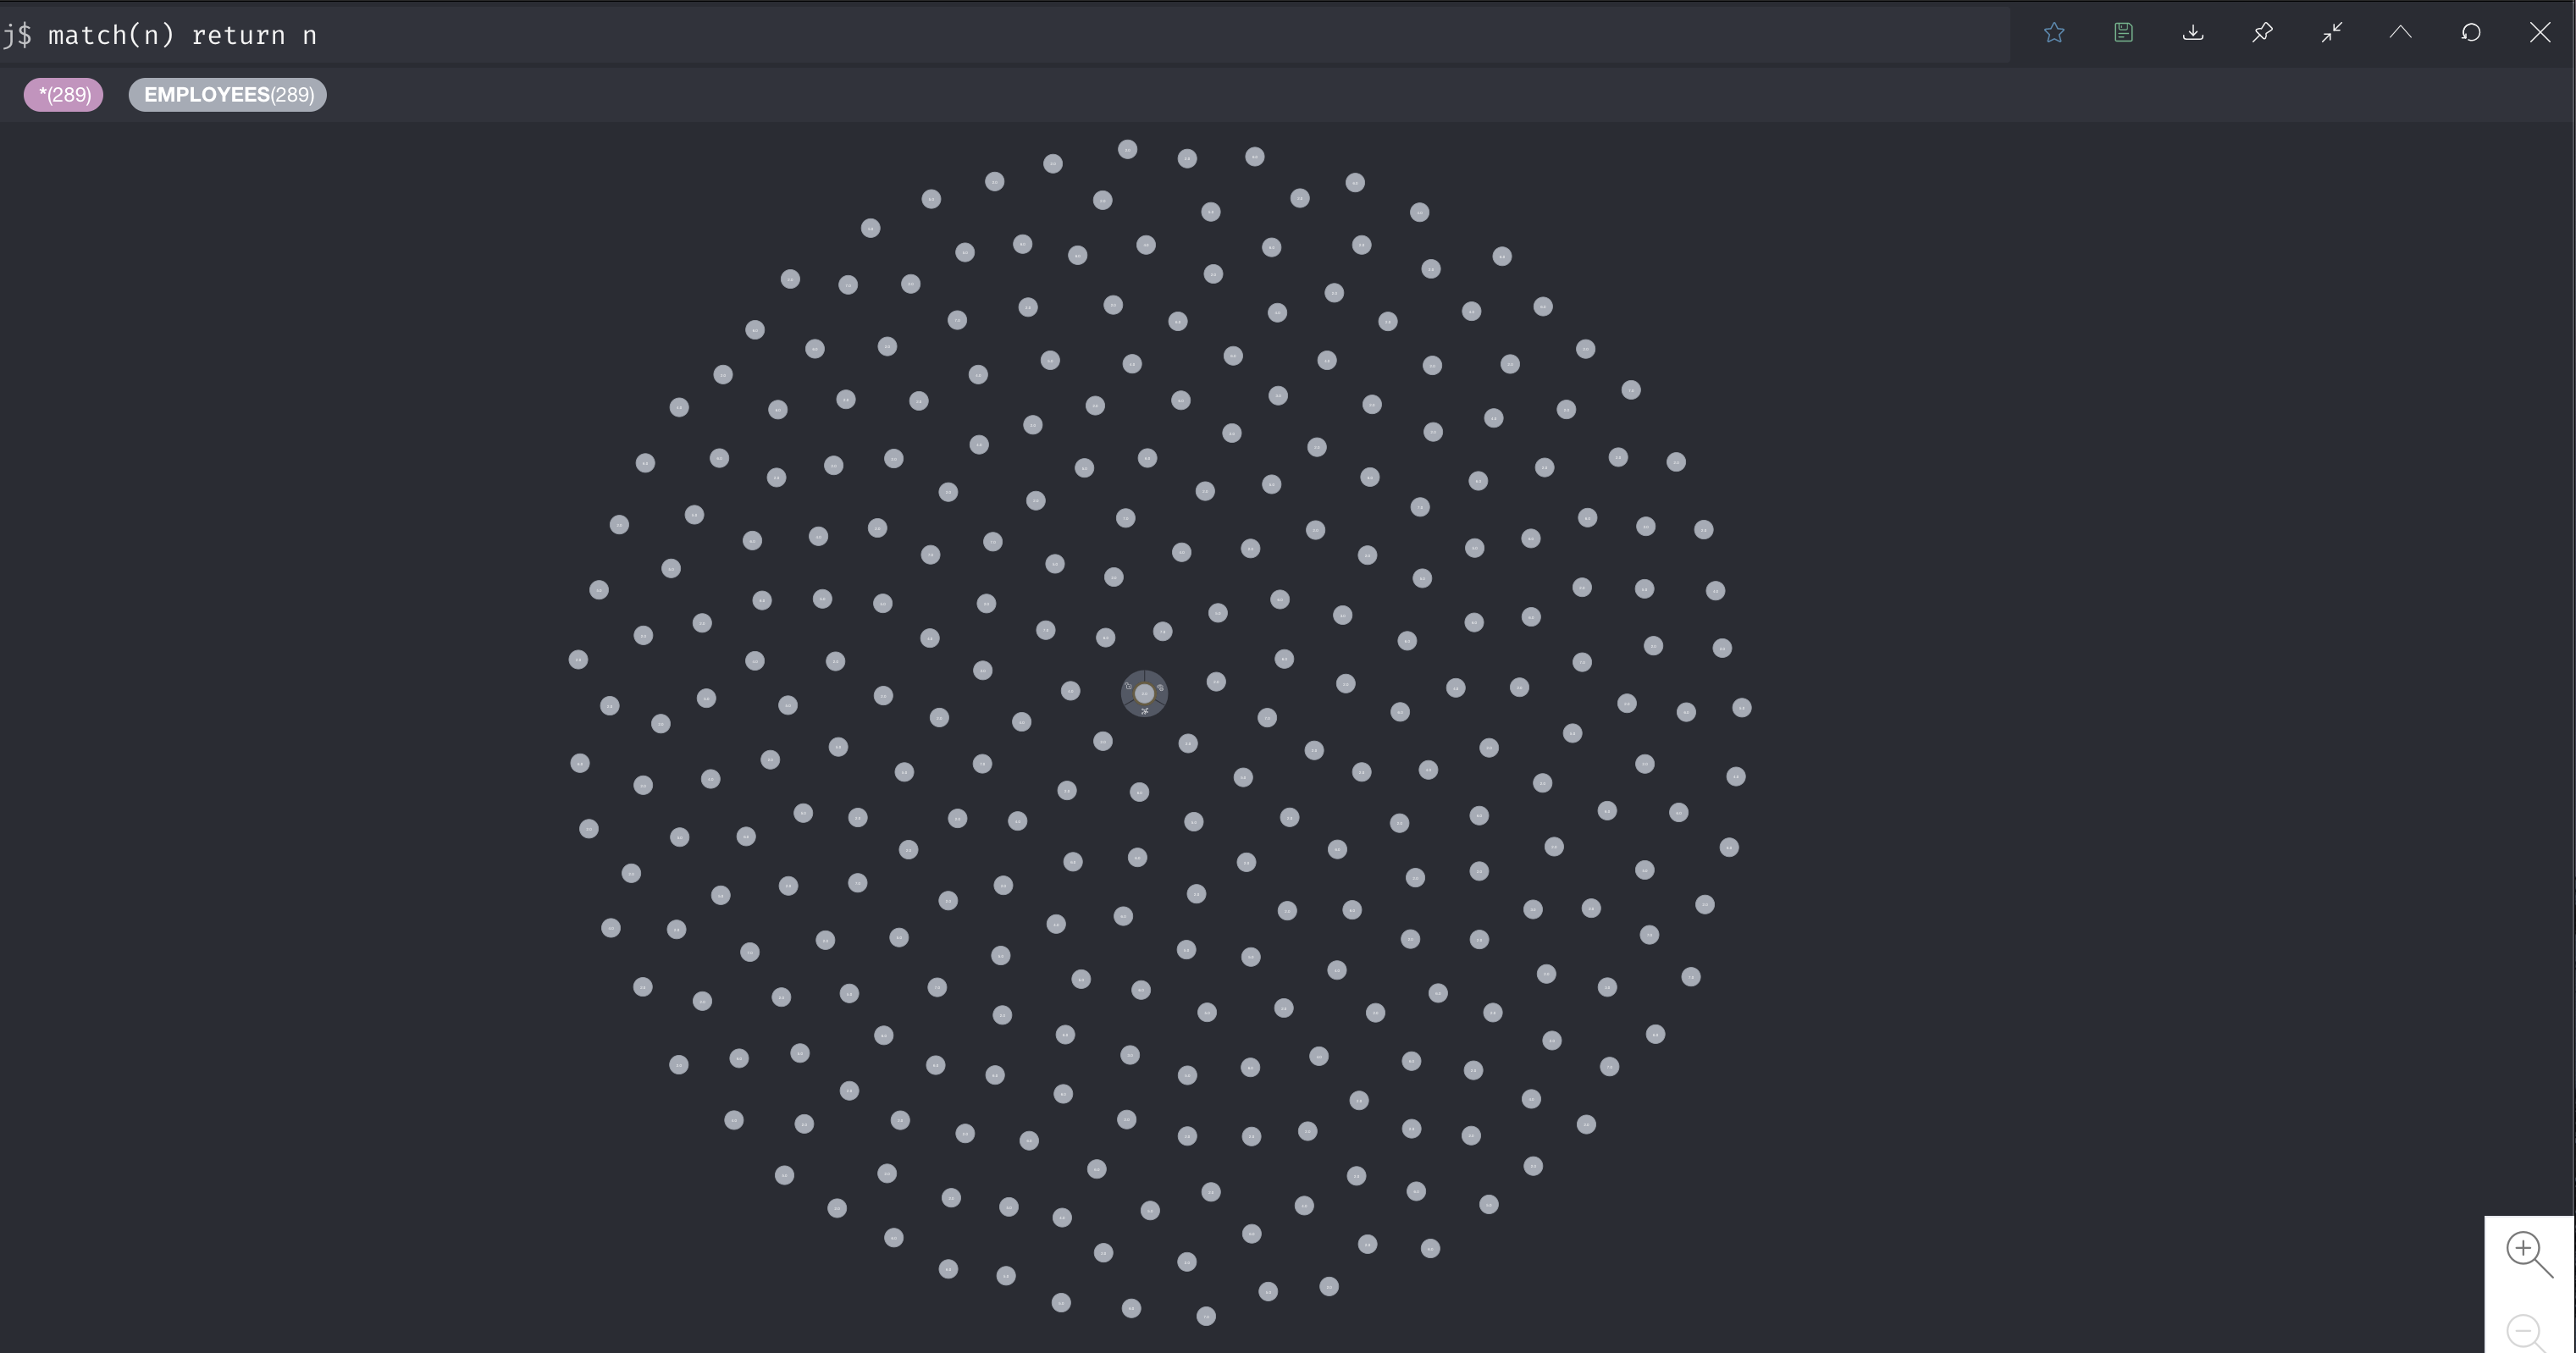

### Comprobar el número de datos ingresados con la siguiente consulta, donde es semilar a longitud de la lista que es de 14999

In [6]:
graph.run("MATCH(n) RETURN COUNT(n)").data()

[{'COUNT(n)': 14999}]

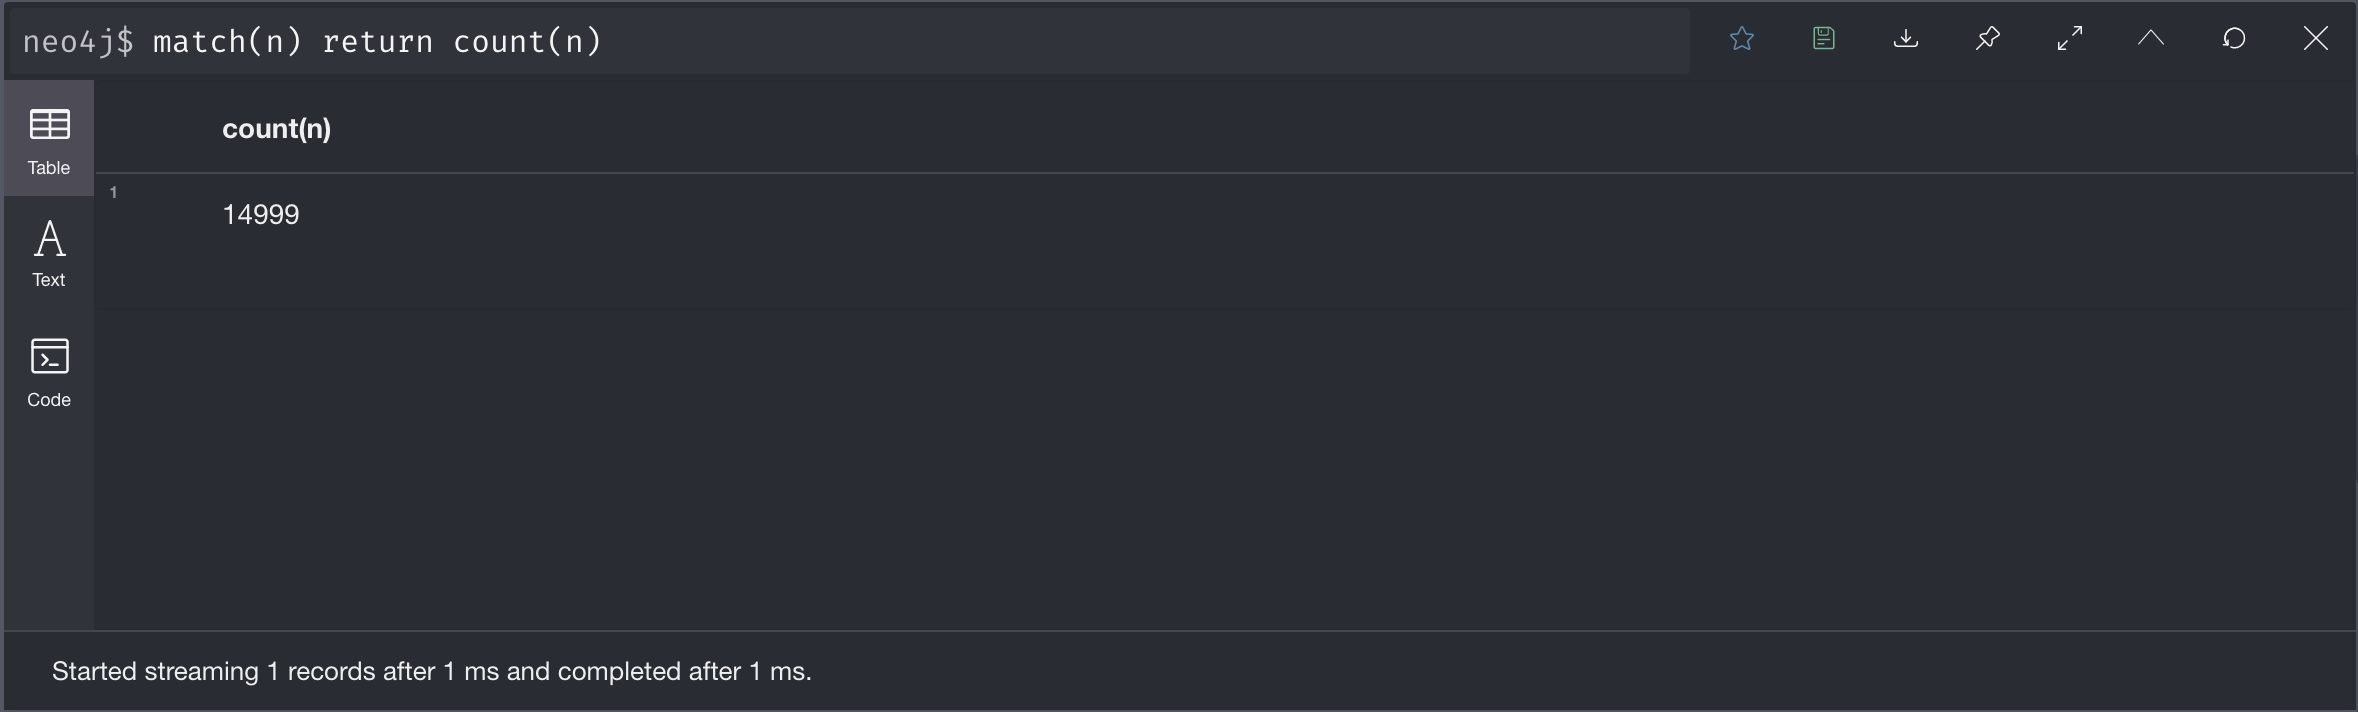
    
    Crear un gráfico para utilizar una proyección nativa y lo almacenará en el catálogo de gráficos con el 
    nombre 'EMPLOYEE'. 
    

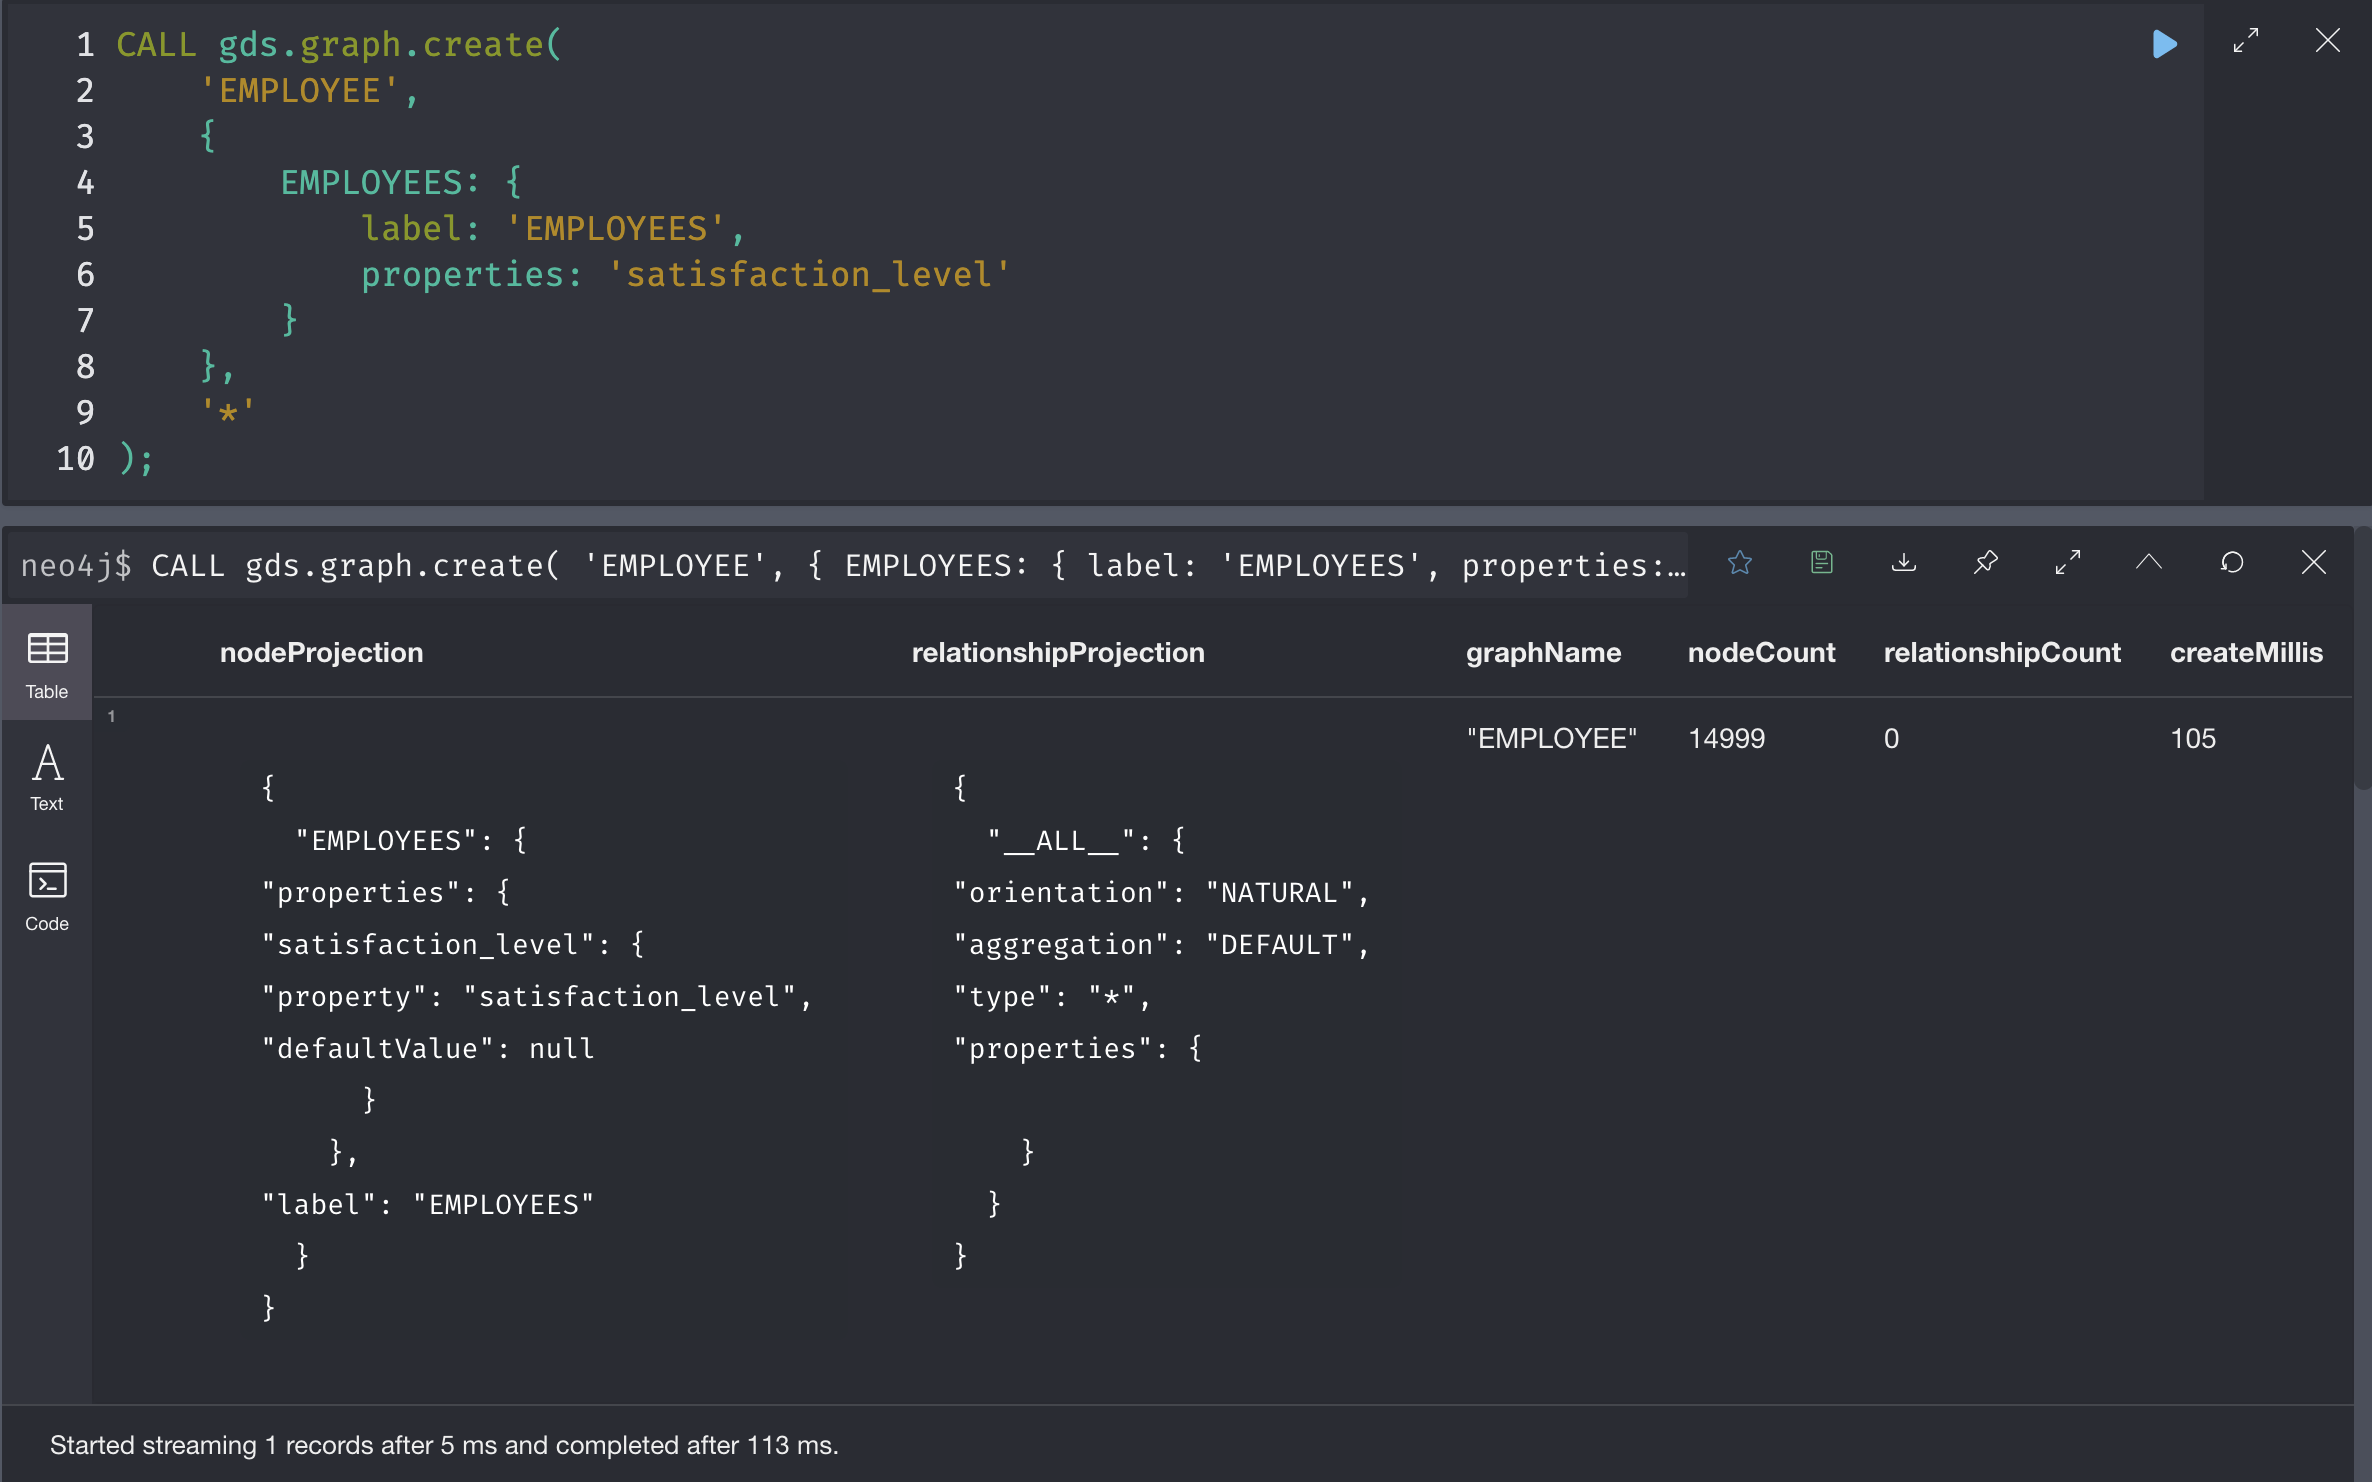

    Estimarán los requisitos de memoria para ejecutar el algoritmo, el algoritmo devuelve la puntuación de 
    similitud para cada relación, lo cual nos devolverá 1000 filas como resultados: 
    
### Resultado de las primeras filas de la primera consulta
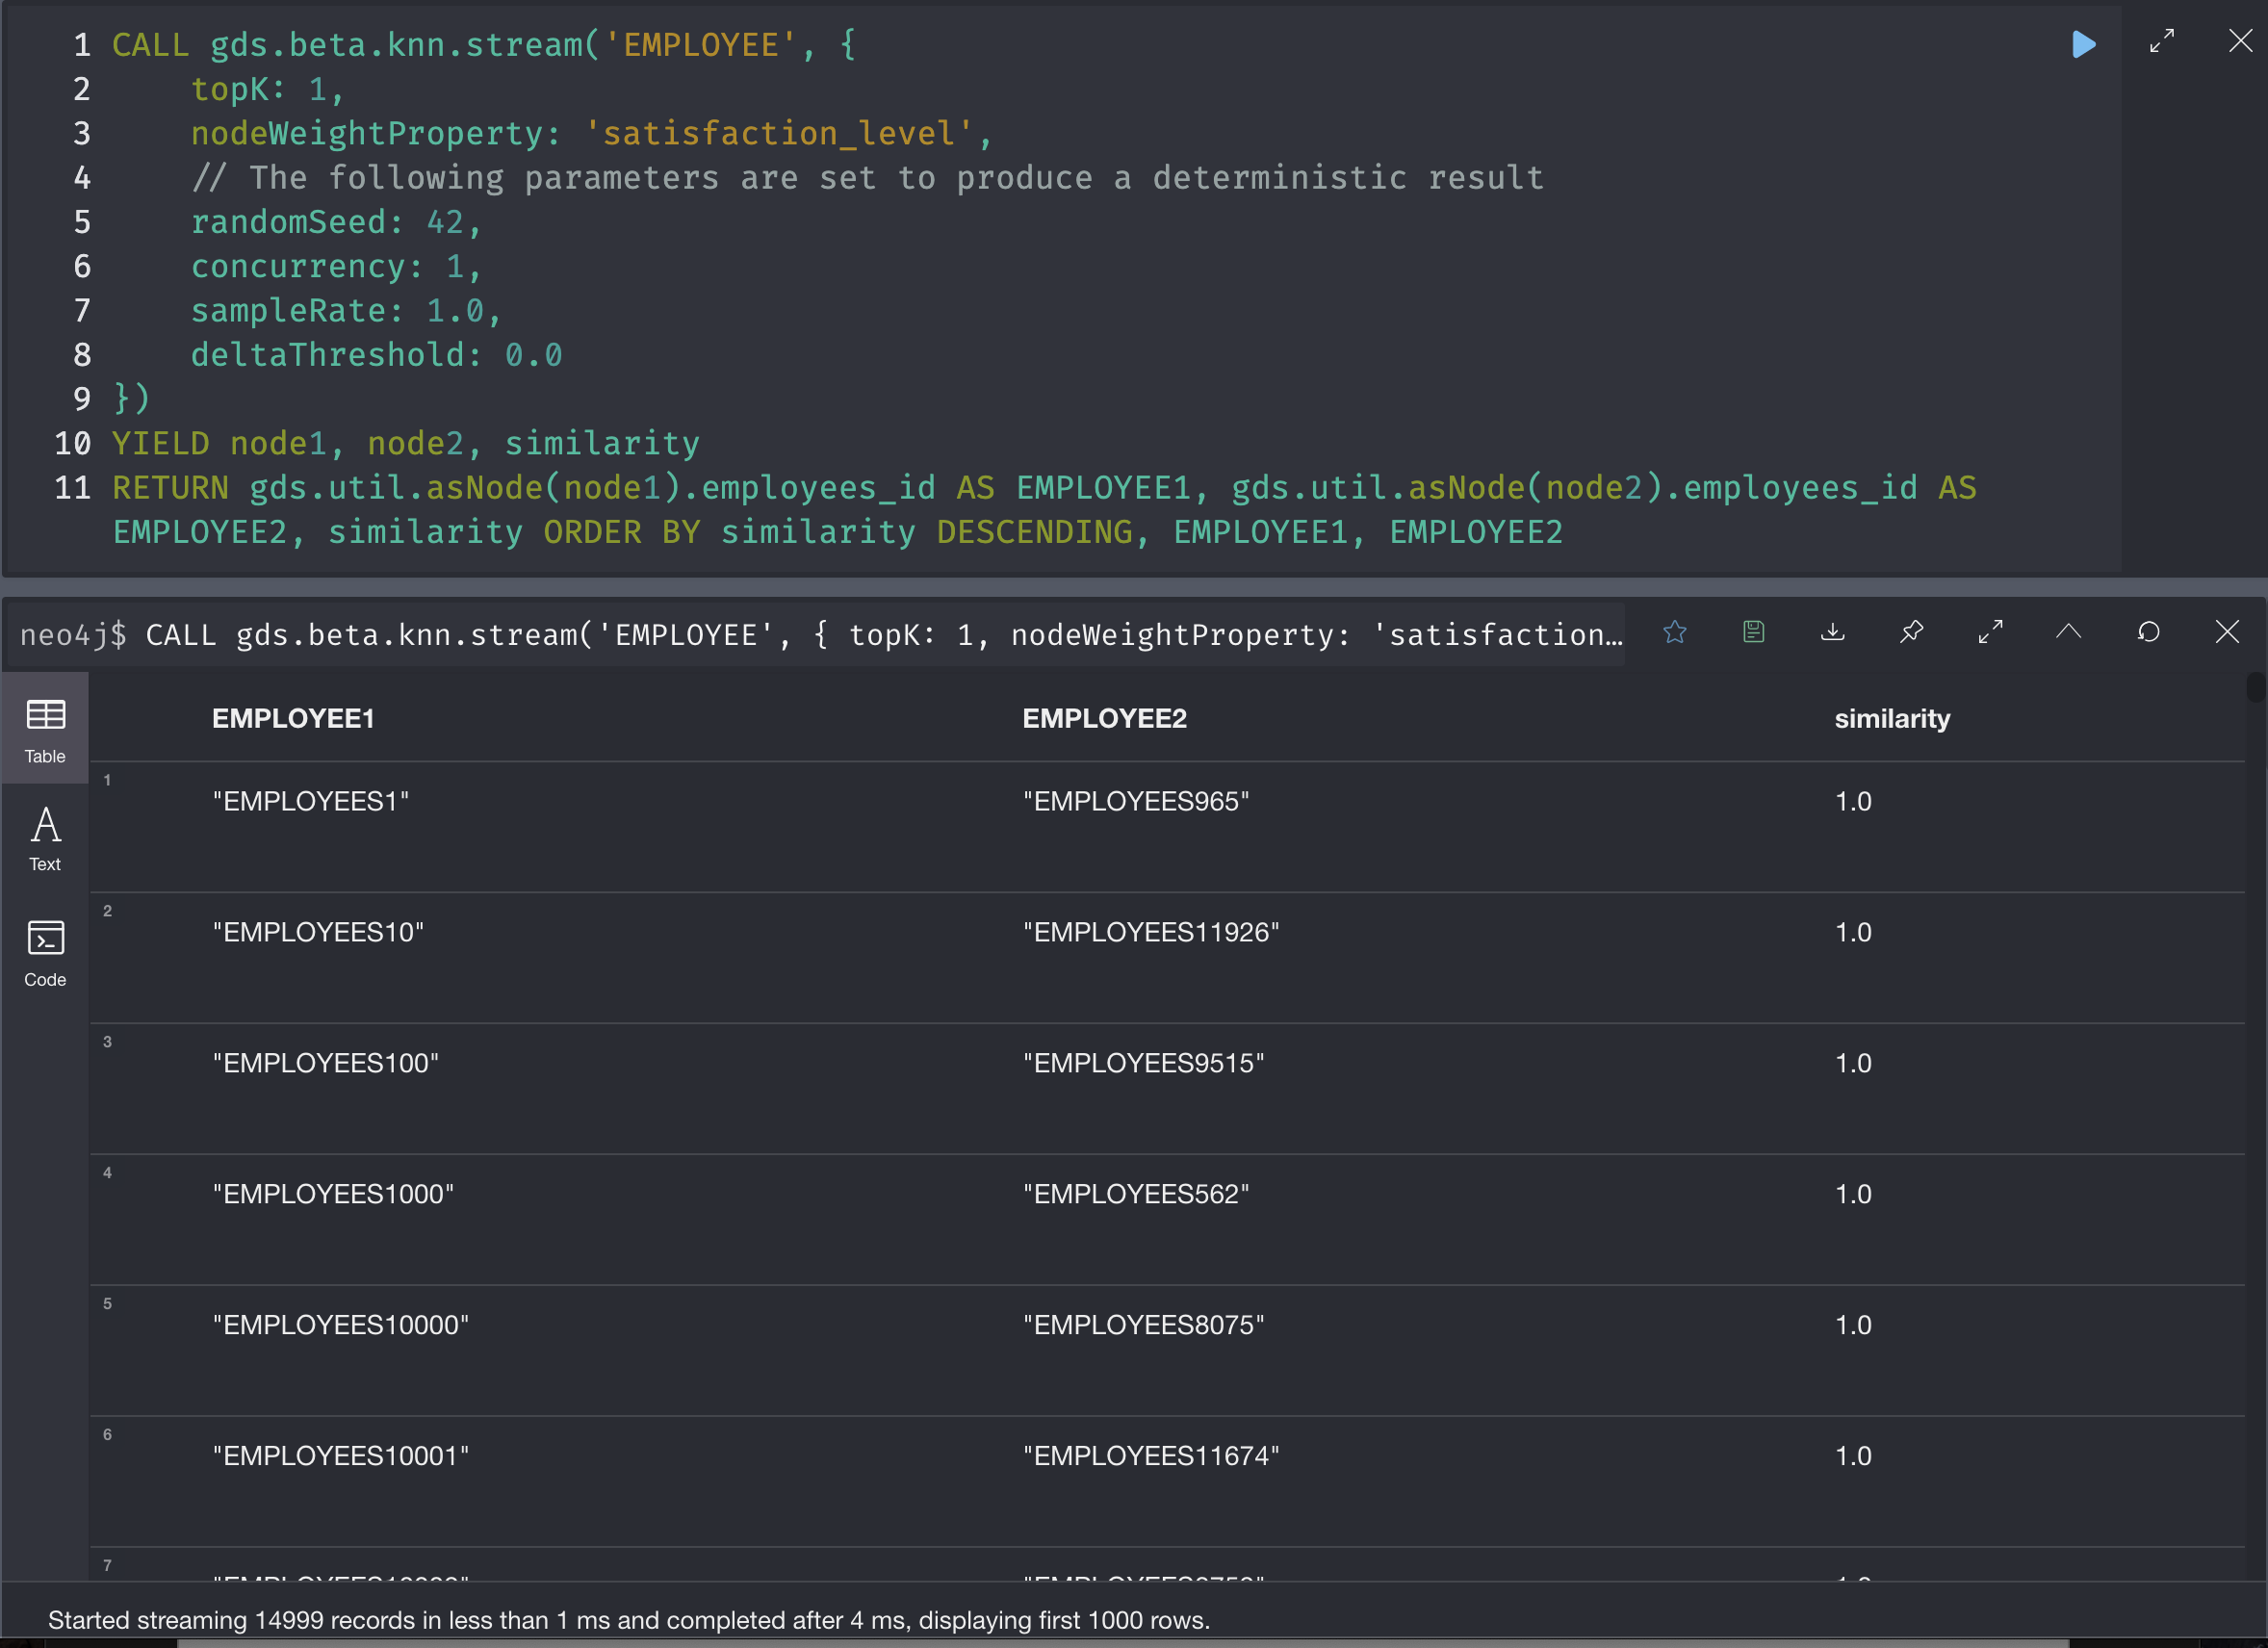

### Resultado de las ultimas filas de la primera consulta
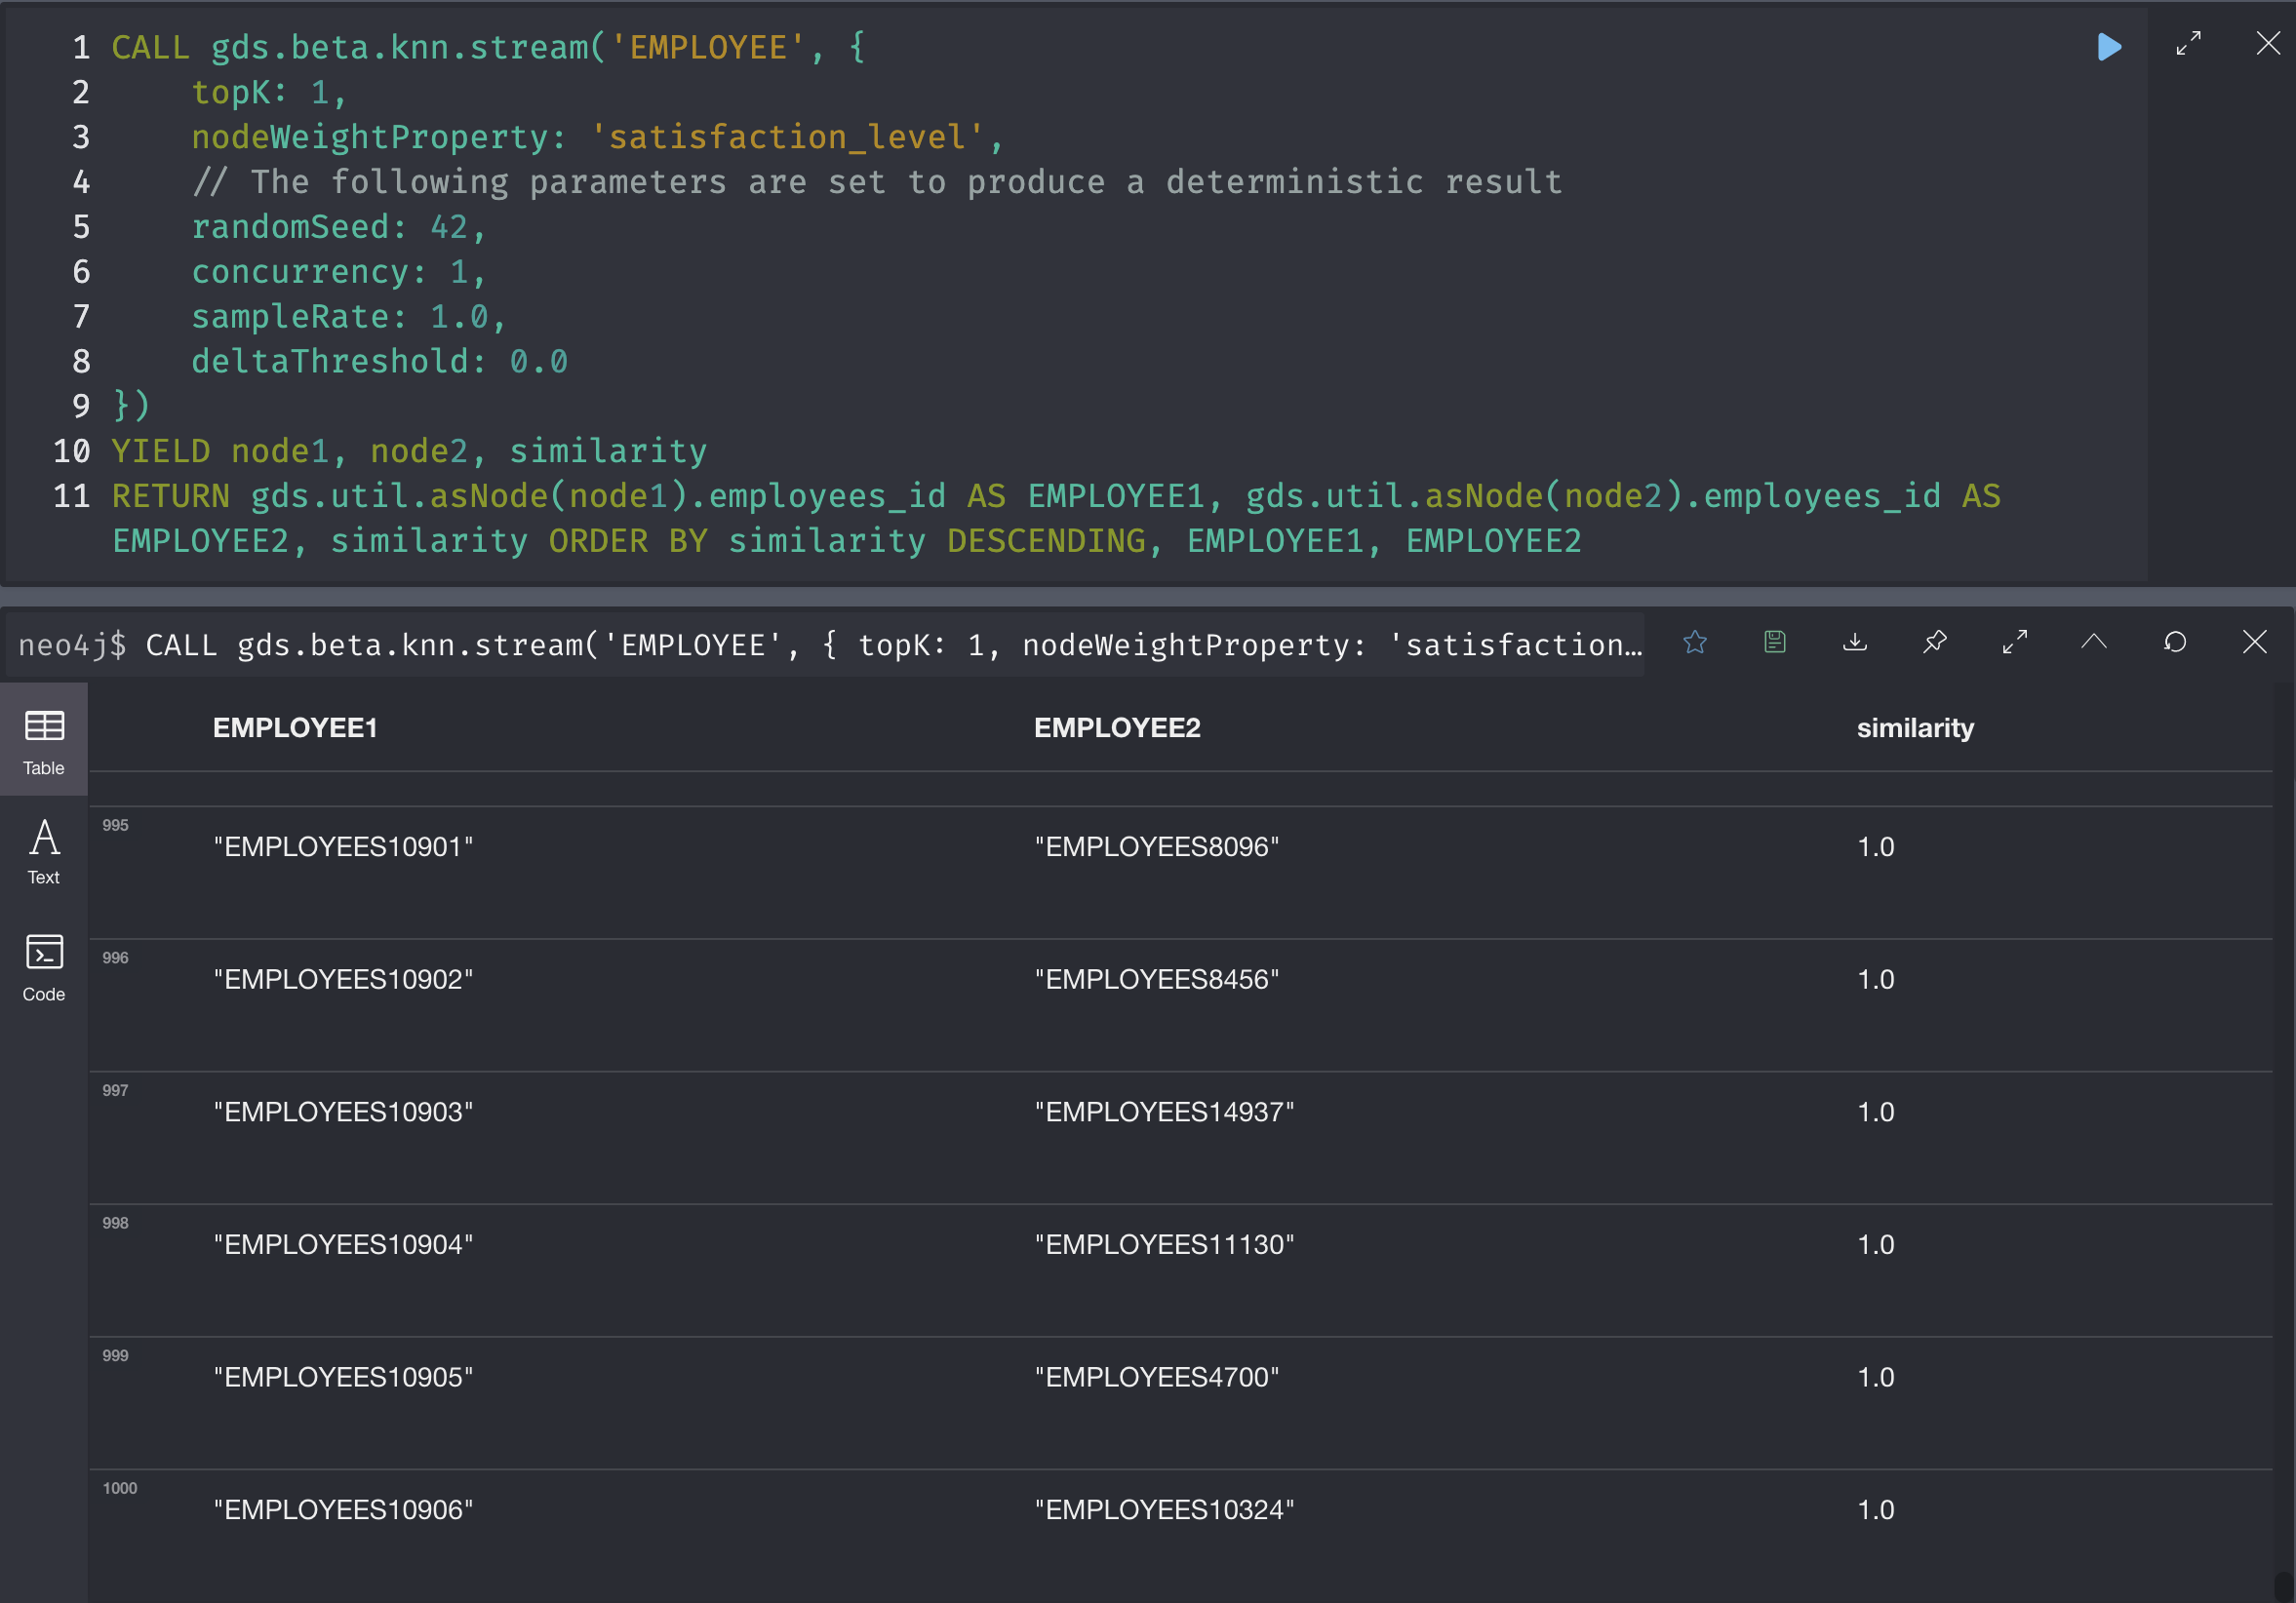
    
### Resultado de las primeras filas de la segunda consulta
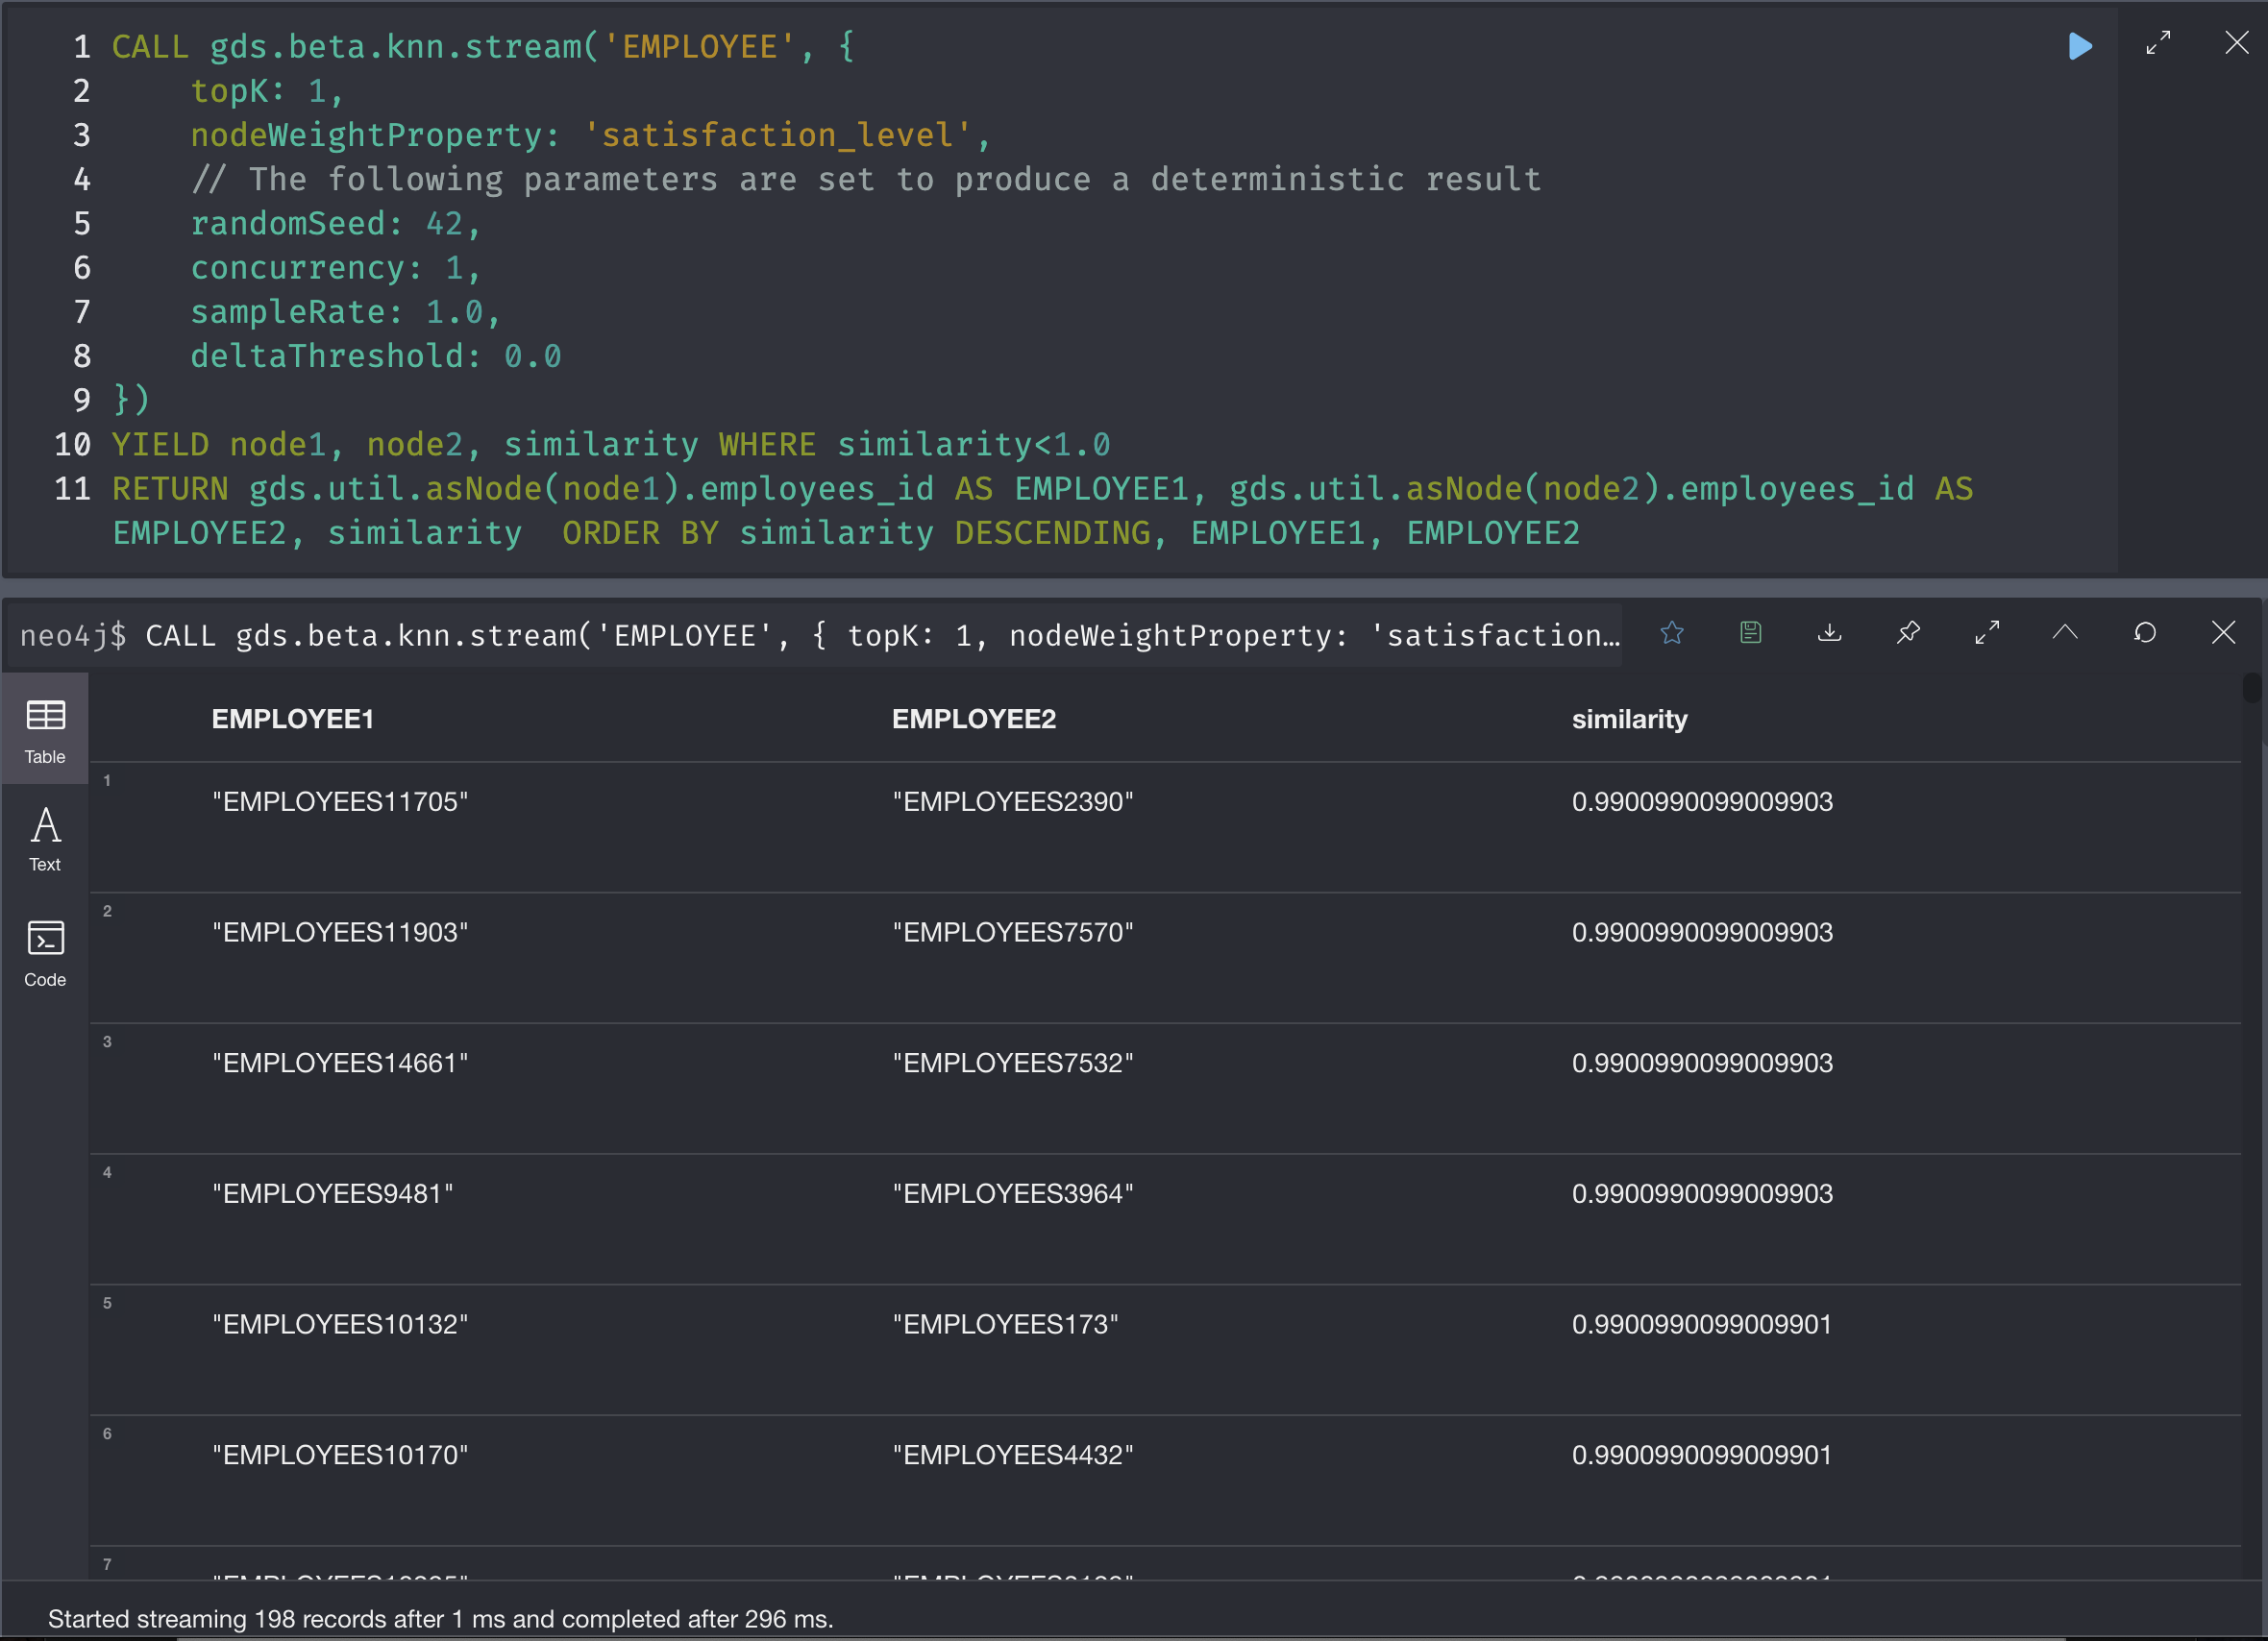

### Resultado de las ultimas filas de la segunda consulta
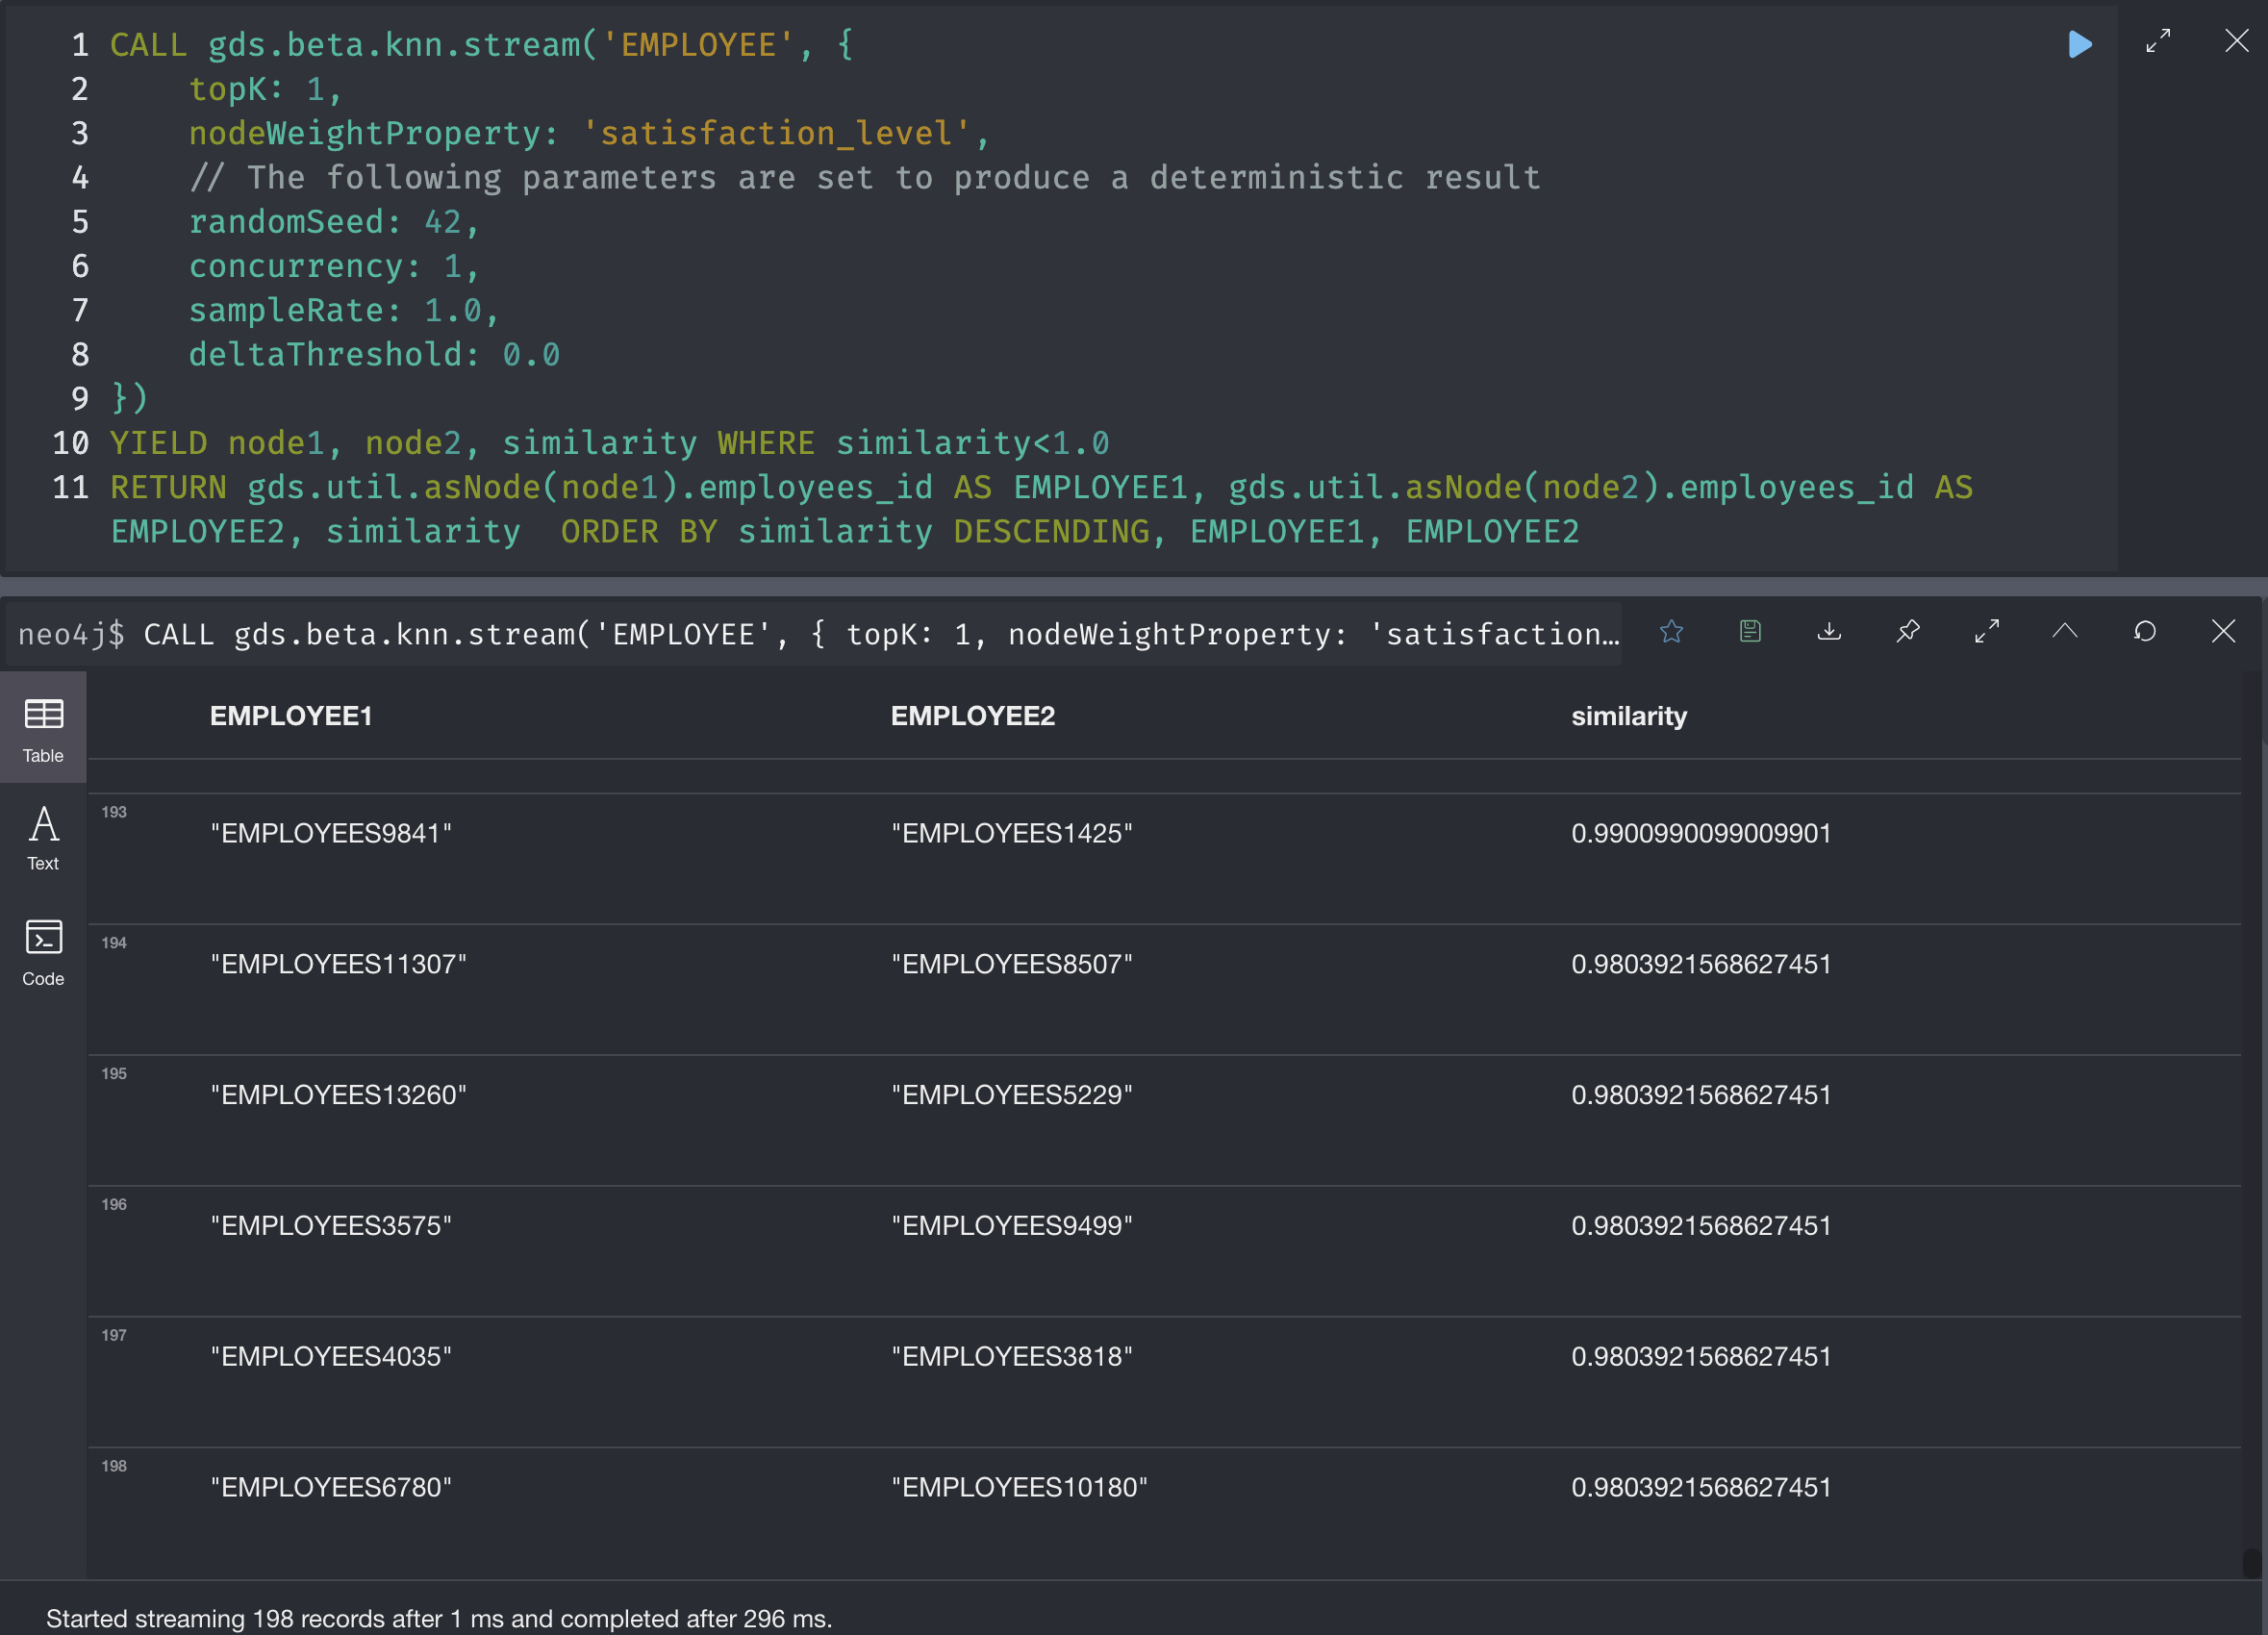

    •	Ingresar cada uno de los datos en un nodo y obtener el grado de similitud se recomienda utilizar la
    distancia Euclidiana o Person, una  vez obtenido la similitud ingresar datos de prueba para validar
    (Máximo 3 datos).

In [13]:
empl = "EMPLOYEESDP1"
graph.run("CREATE (EMPLOYEES"+str(cont)+":EMPLOYEES {employees_id:'"+empl+"',satisfaction_level:"+'0.3'+"})").data()

[]

In [14]:
empl = "EMPLOYEESDP2"
graph.run("CREATE (EMPLOYEES"+str(cont)+":EMPLOYEES {employees_id:'"+empl+"',satisfaction_level:"+'0.6'+"})").data()

[]

In [16]:
graph.run("MATCH(N:EMPLOYEES) WHERE N.employees_id = 'EMPLOYEESDP1' OR N.employees_id = 'EMPLOYEESDP2'  RETURN N").data()

[{'N': Node('EMPLOYEES', employees_id='EMPLOYEESDP1', satisfaction_level=0.3)},
 {'N': Node('EMPLOYEES', employees_id='EMPLOYEESDP2', satisfaction_level=0.6)}]

Comprobar el ingreso de los dos ultimos datos:

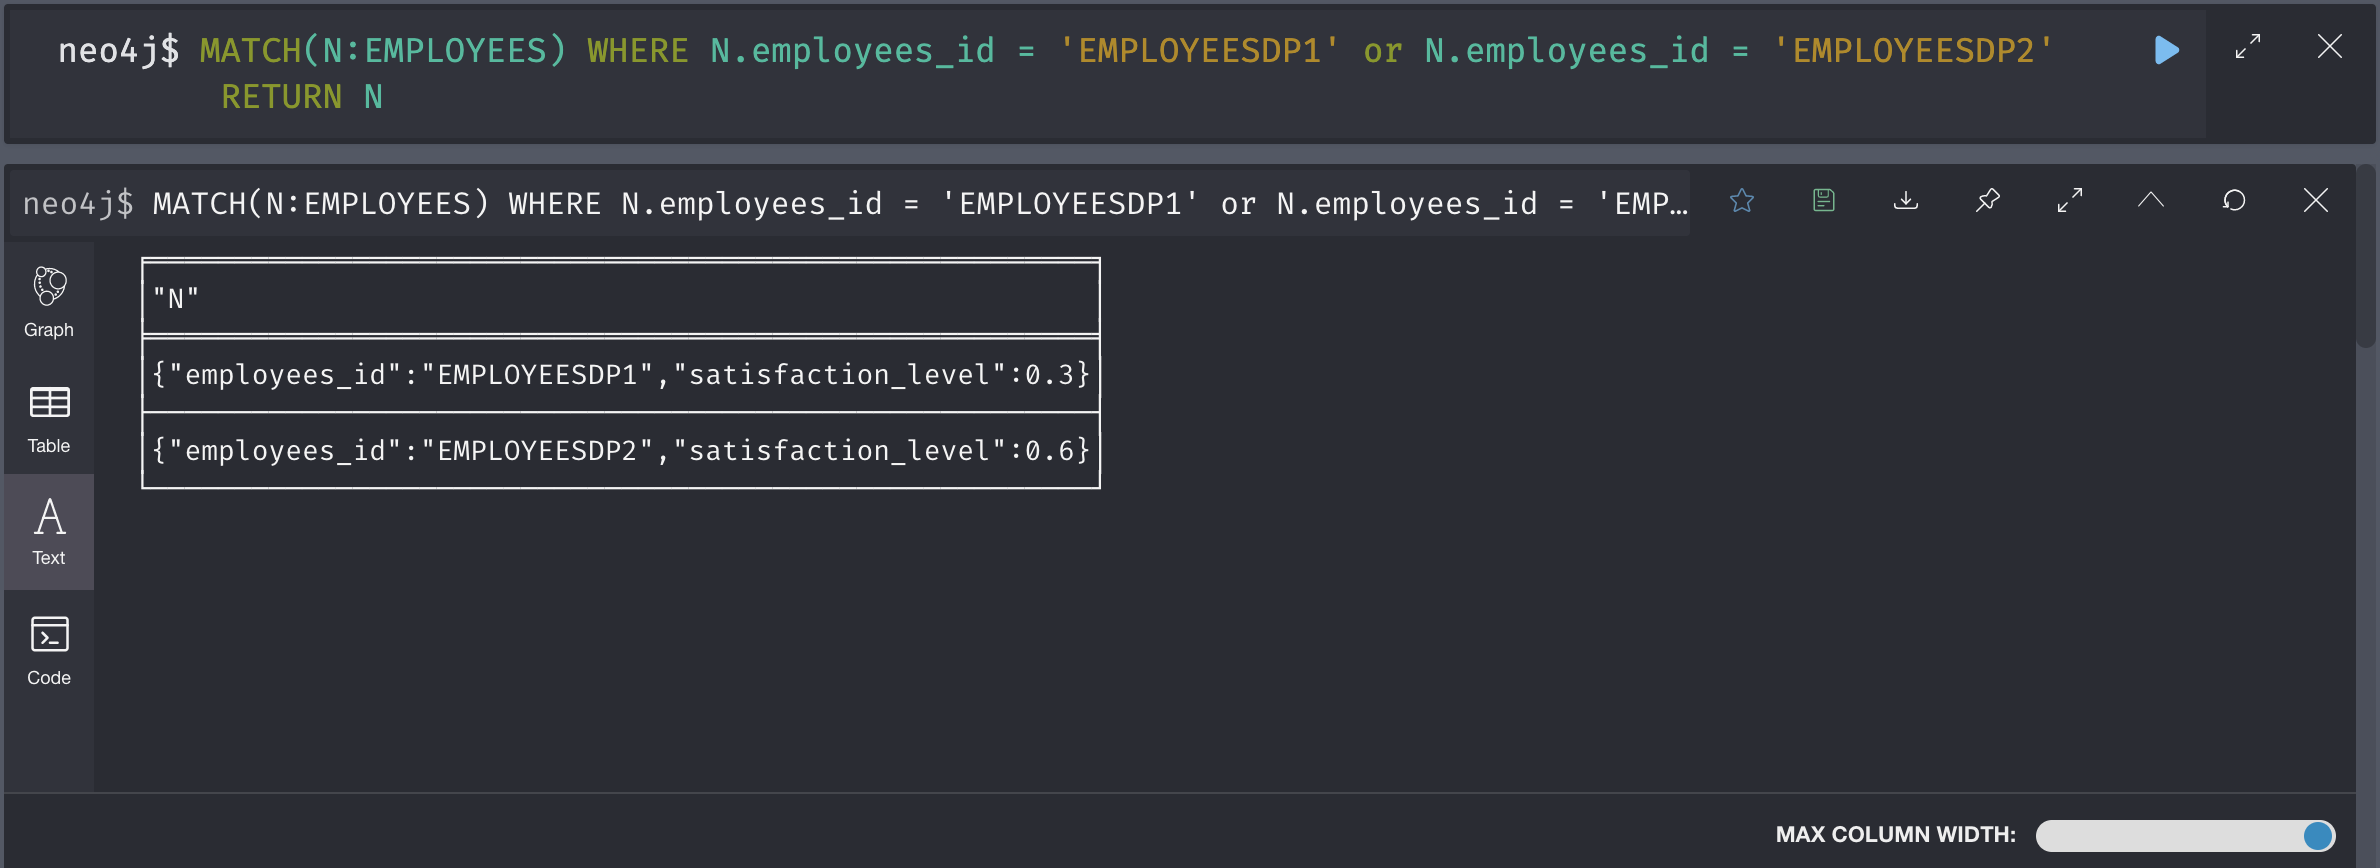


Comprobar el ingreso de los dos ultimos datos, con un count de los datos que se encuentras en la base de datos, más de los 14999 que están ingreesado como se mostro anteriormente:

In [17]:
graph.run("MATCH(n) RETURN COUNT(n)").data()

[{'COUNT(n)': 15001}]

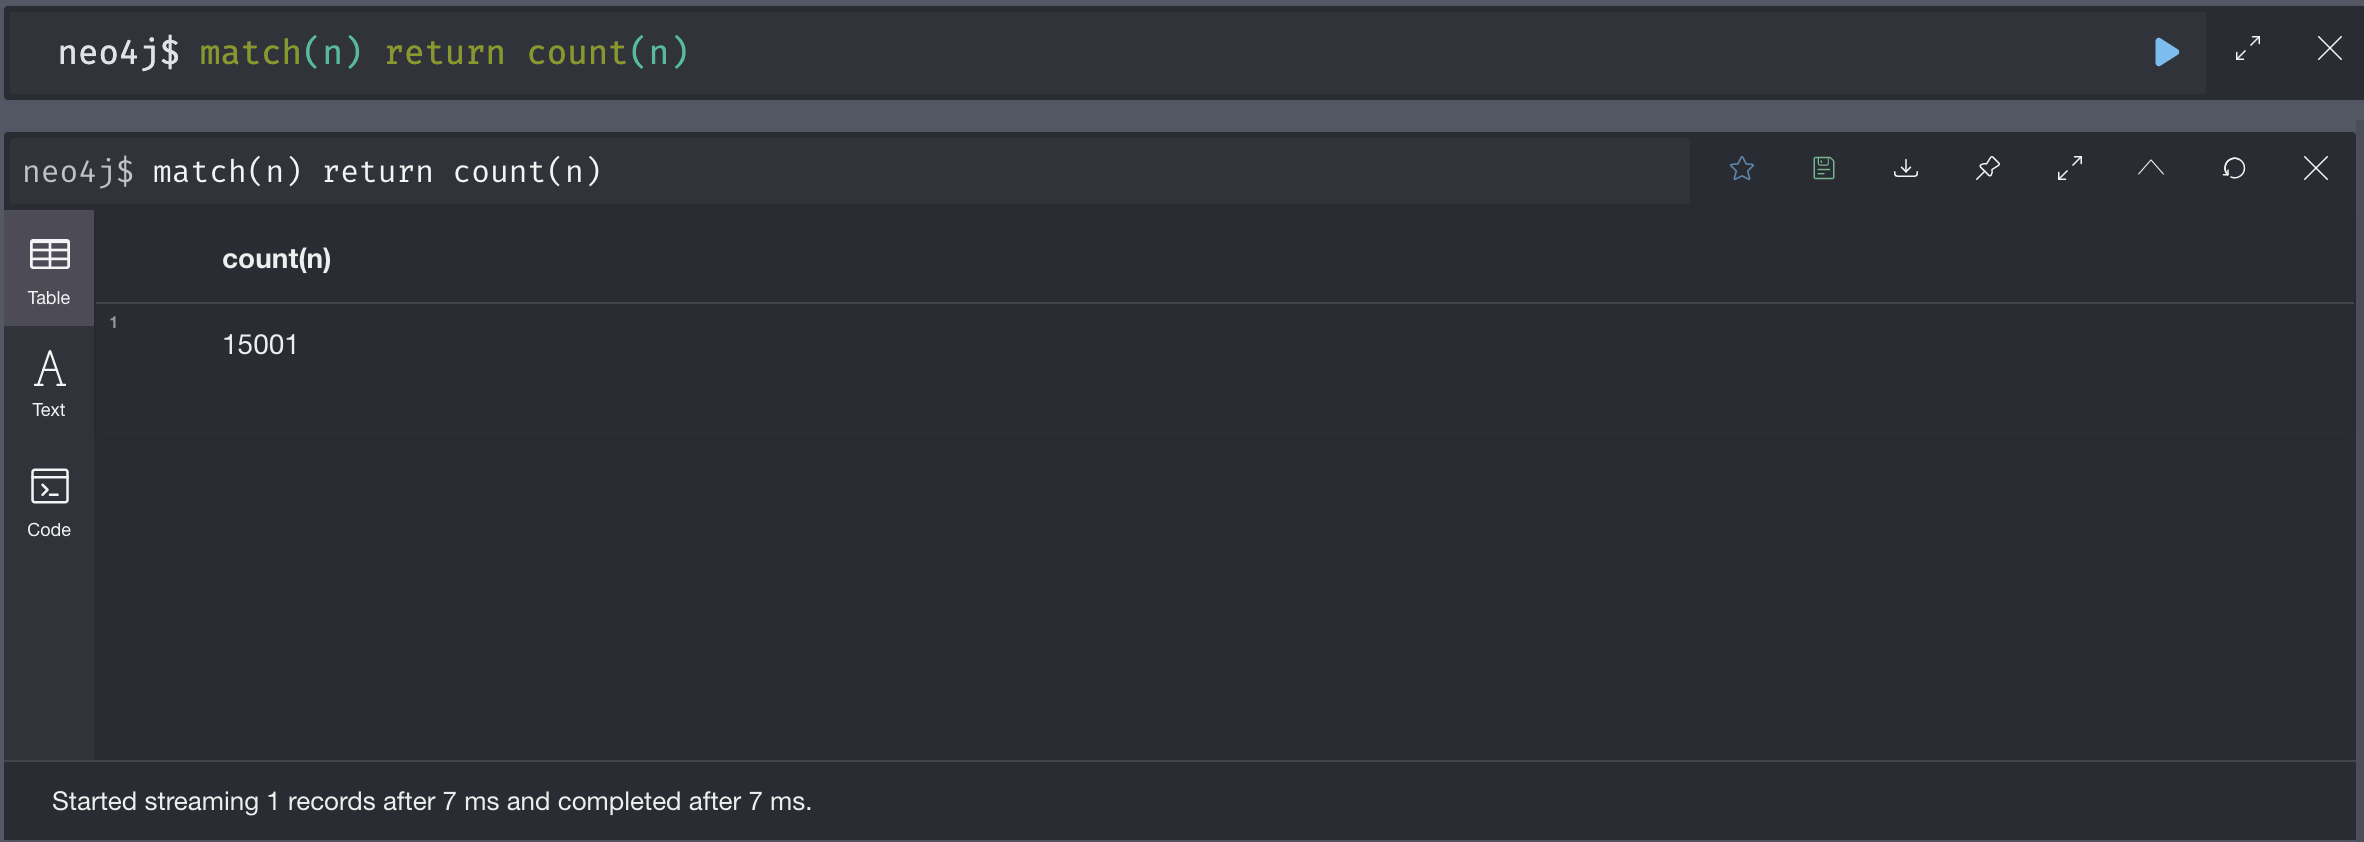

    Crear un gráfico para utilizar una proyección nativa y lo almacenará en el catálogo de gráficos con el 
    nombre 'EMPLOYEE1'.

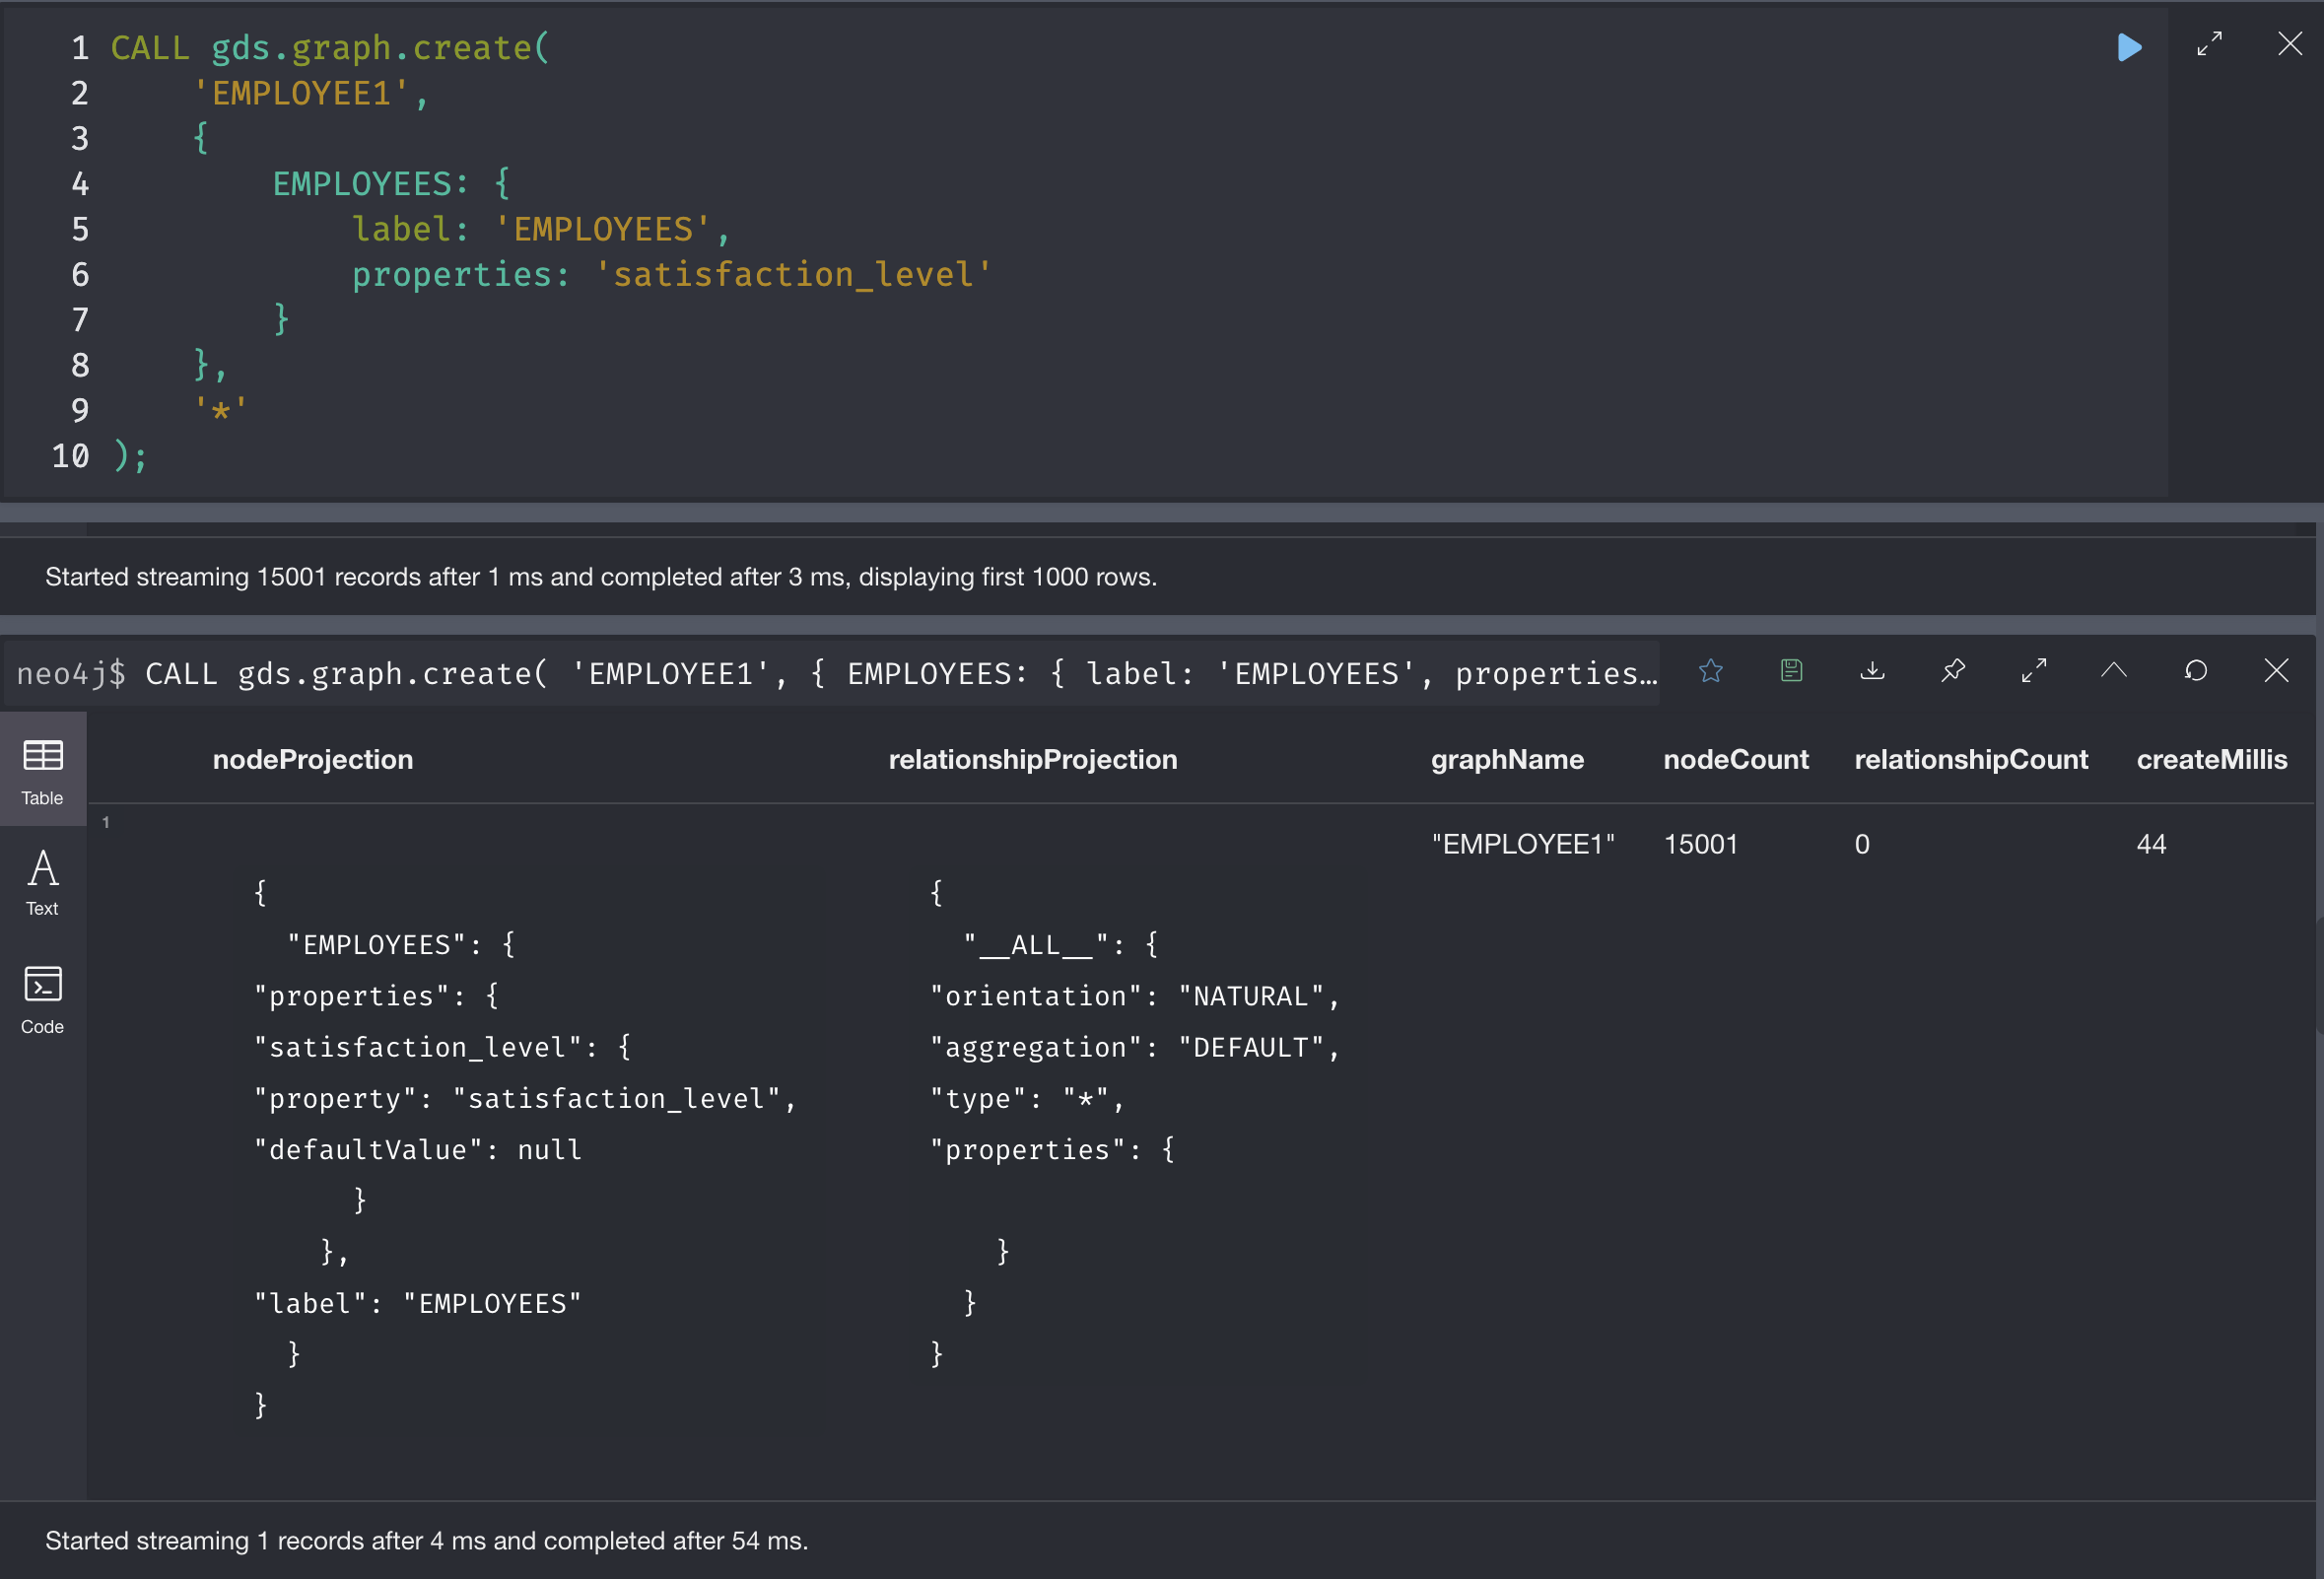


    Estimarán los requisitos de memoria para ejecutar el algoritmo, el algoritmo devuelve la puntuación de 
    similitud para cada relación, lo cual nos devolverá 1 fila como resultados, debido a que no escuentras Más 
    similitudes: 

### Resultado de las primeras filas de la primera consulta con el satisfaction_level = "EMPLOYEESDP1"
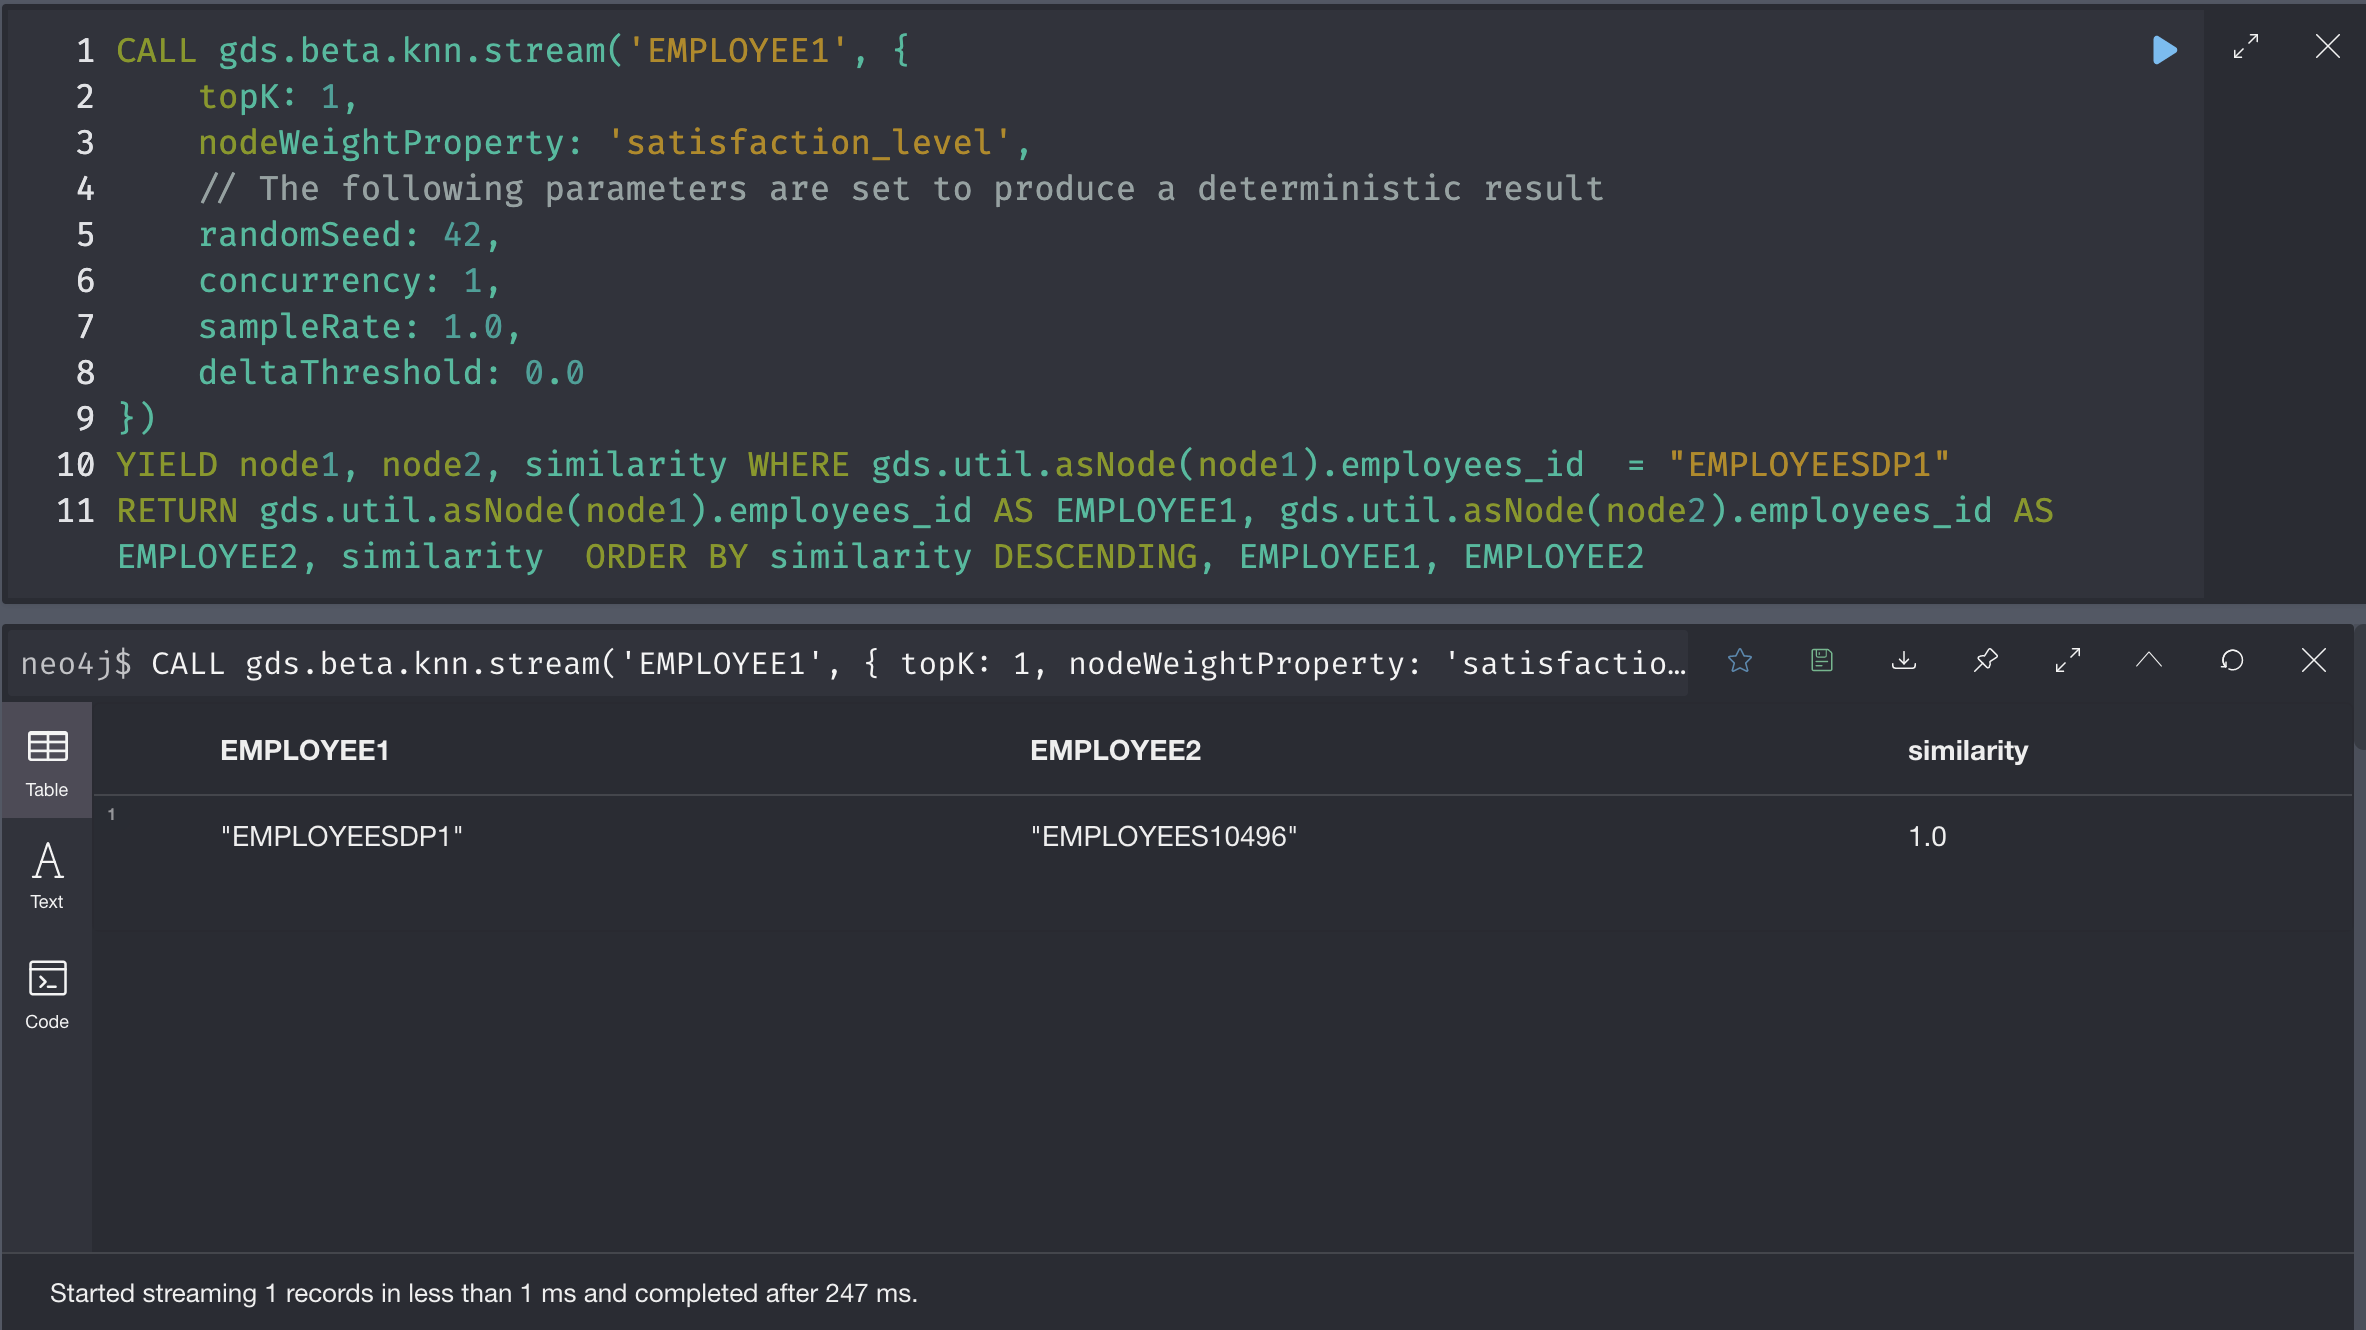

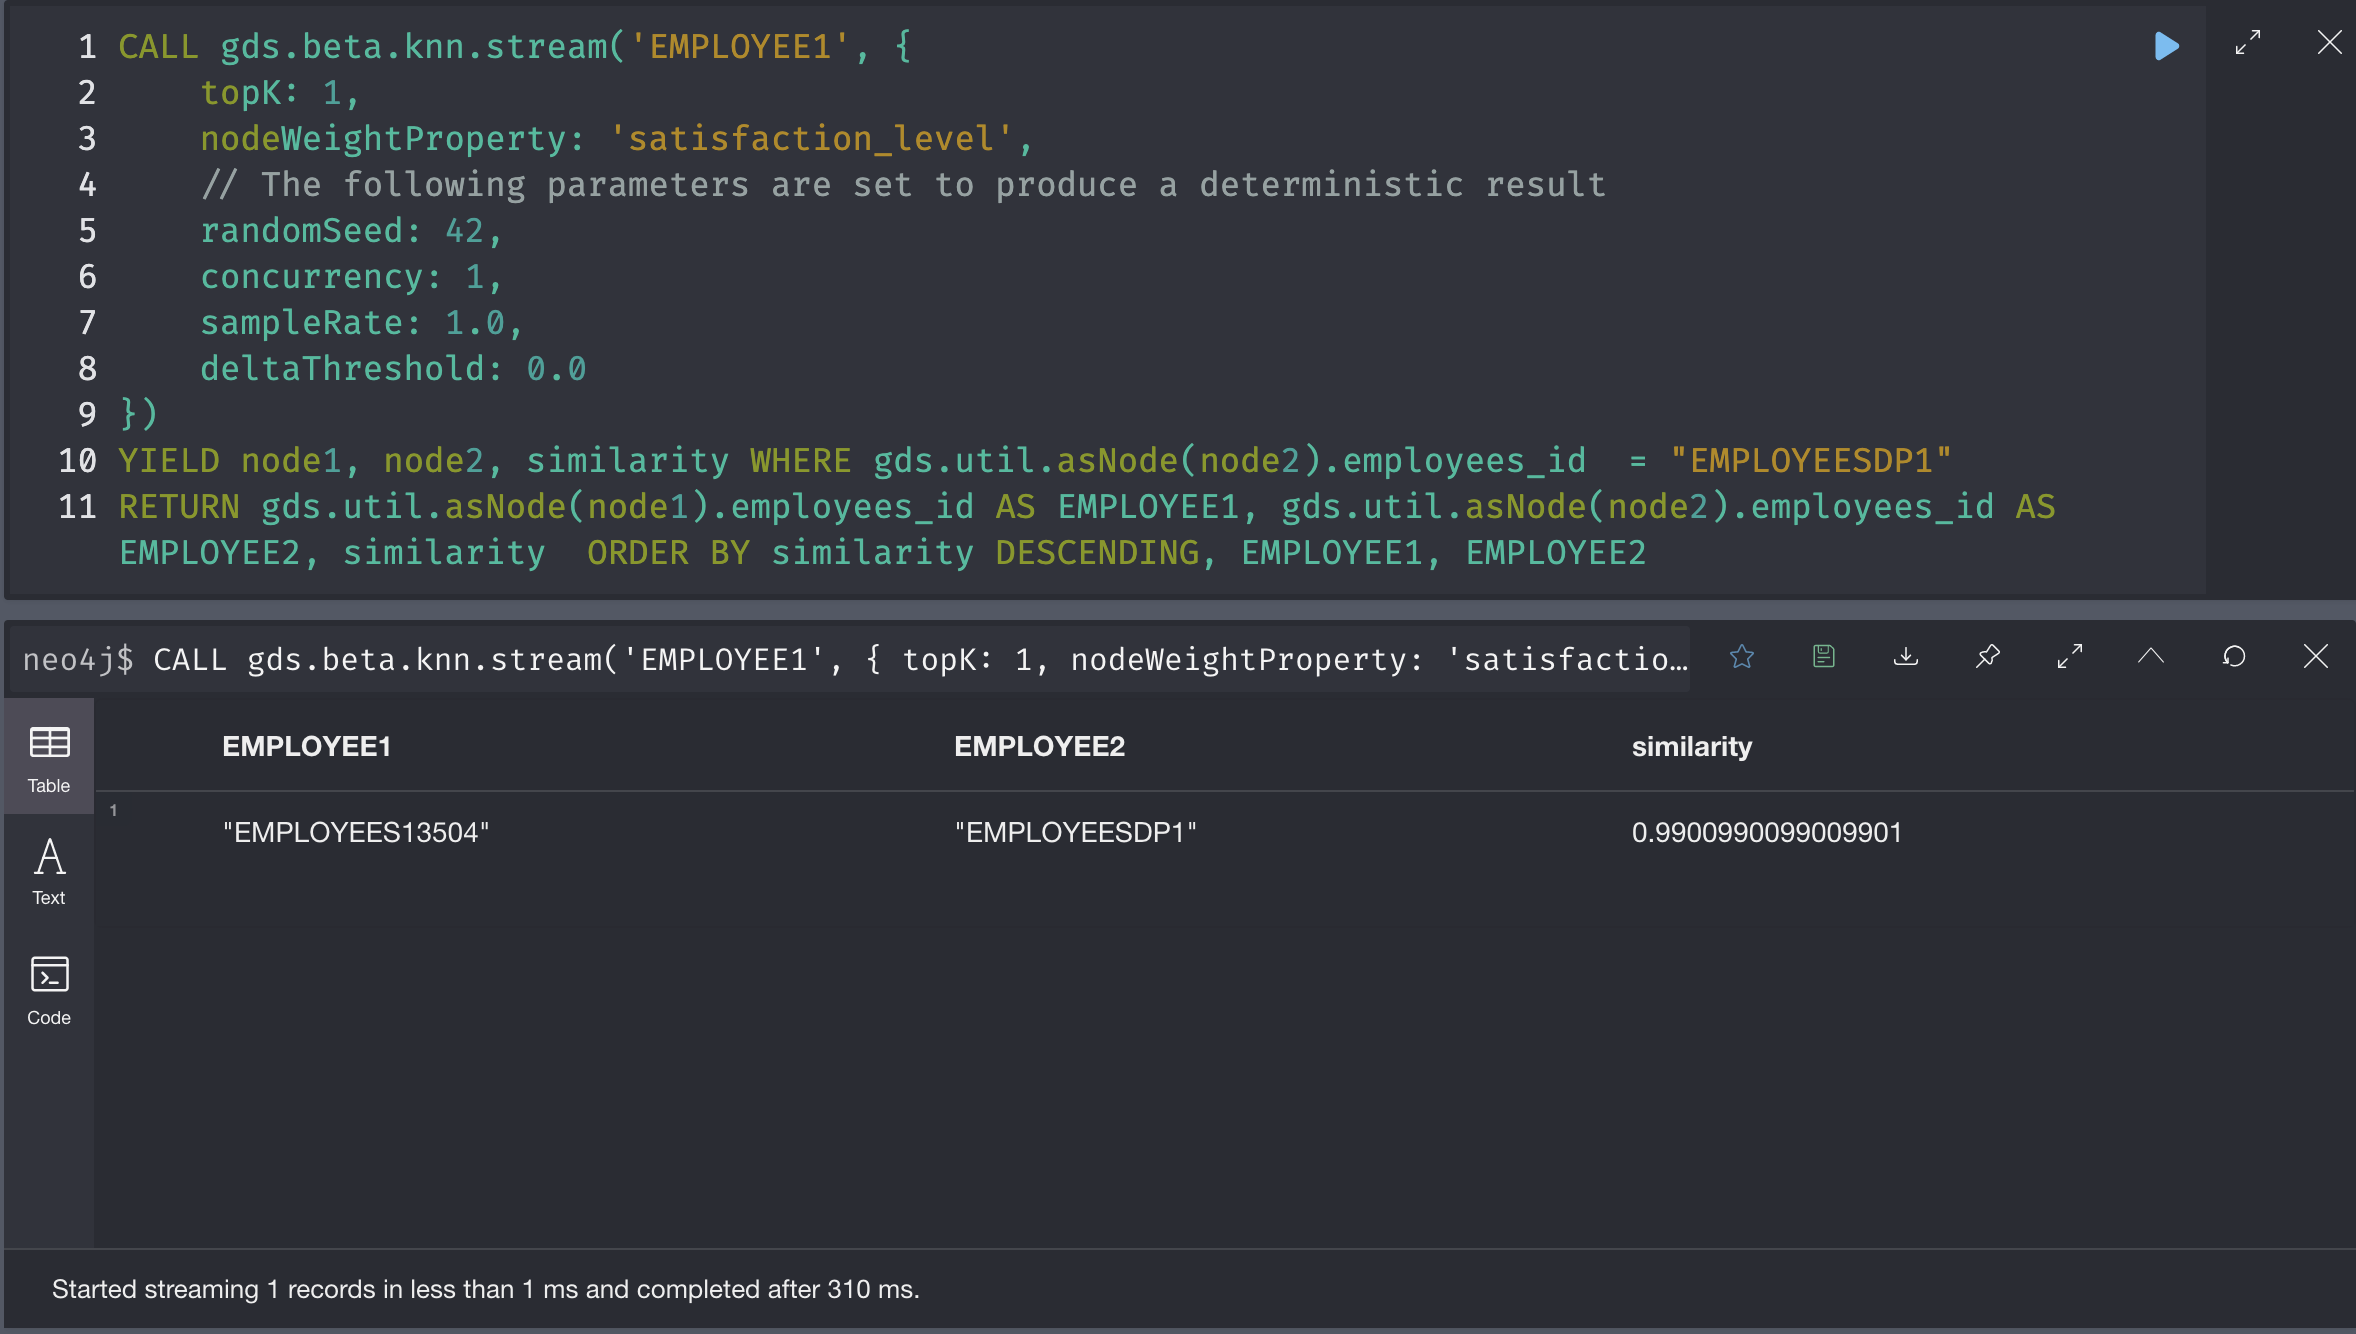

### Resultado de las primeras filas de la primera consulta con el satisfaction_level = "EMPLOYEESDP2"

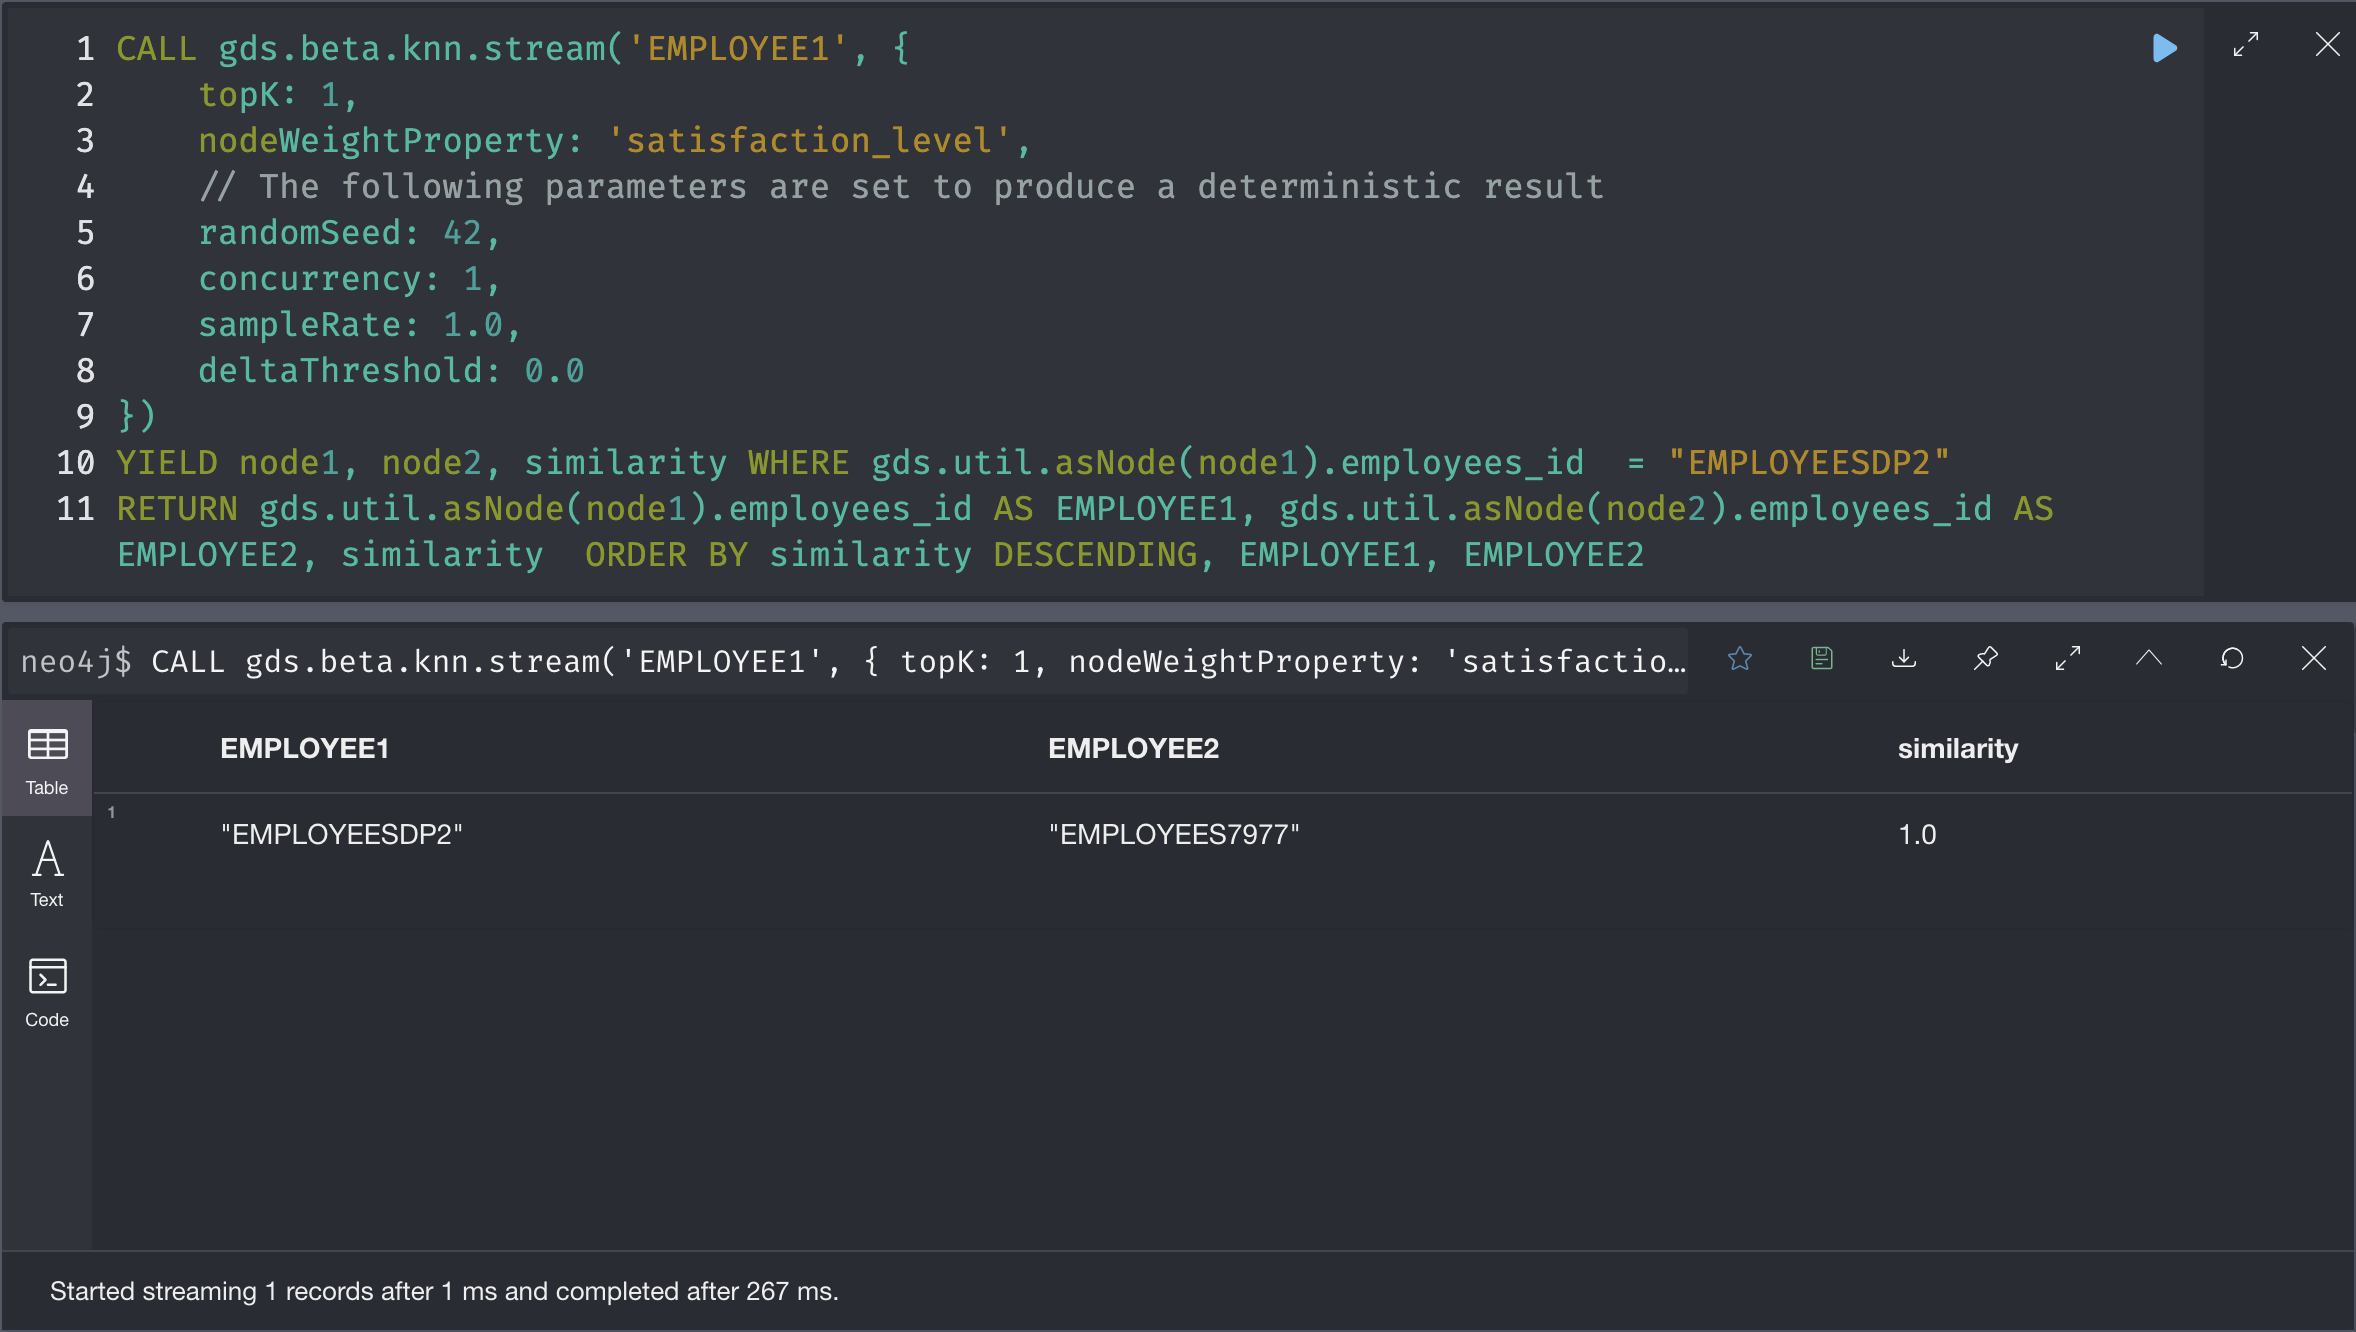

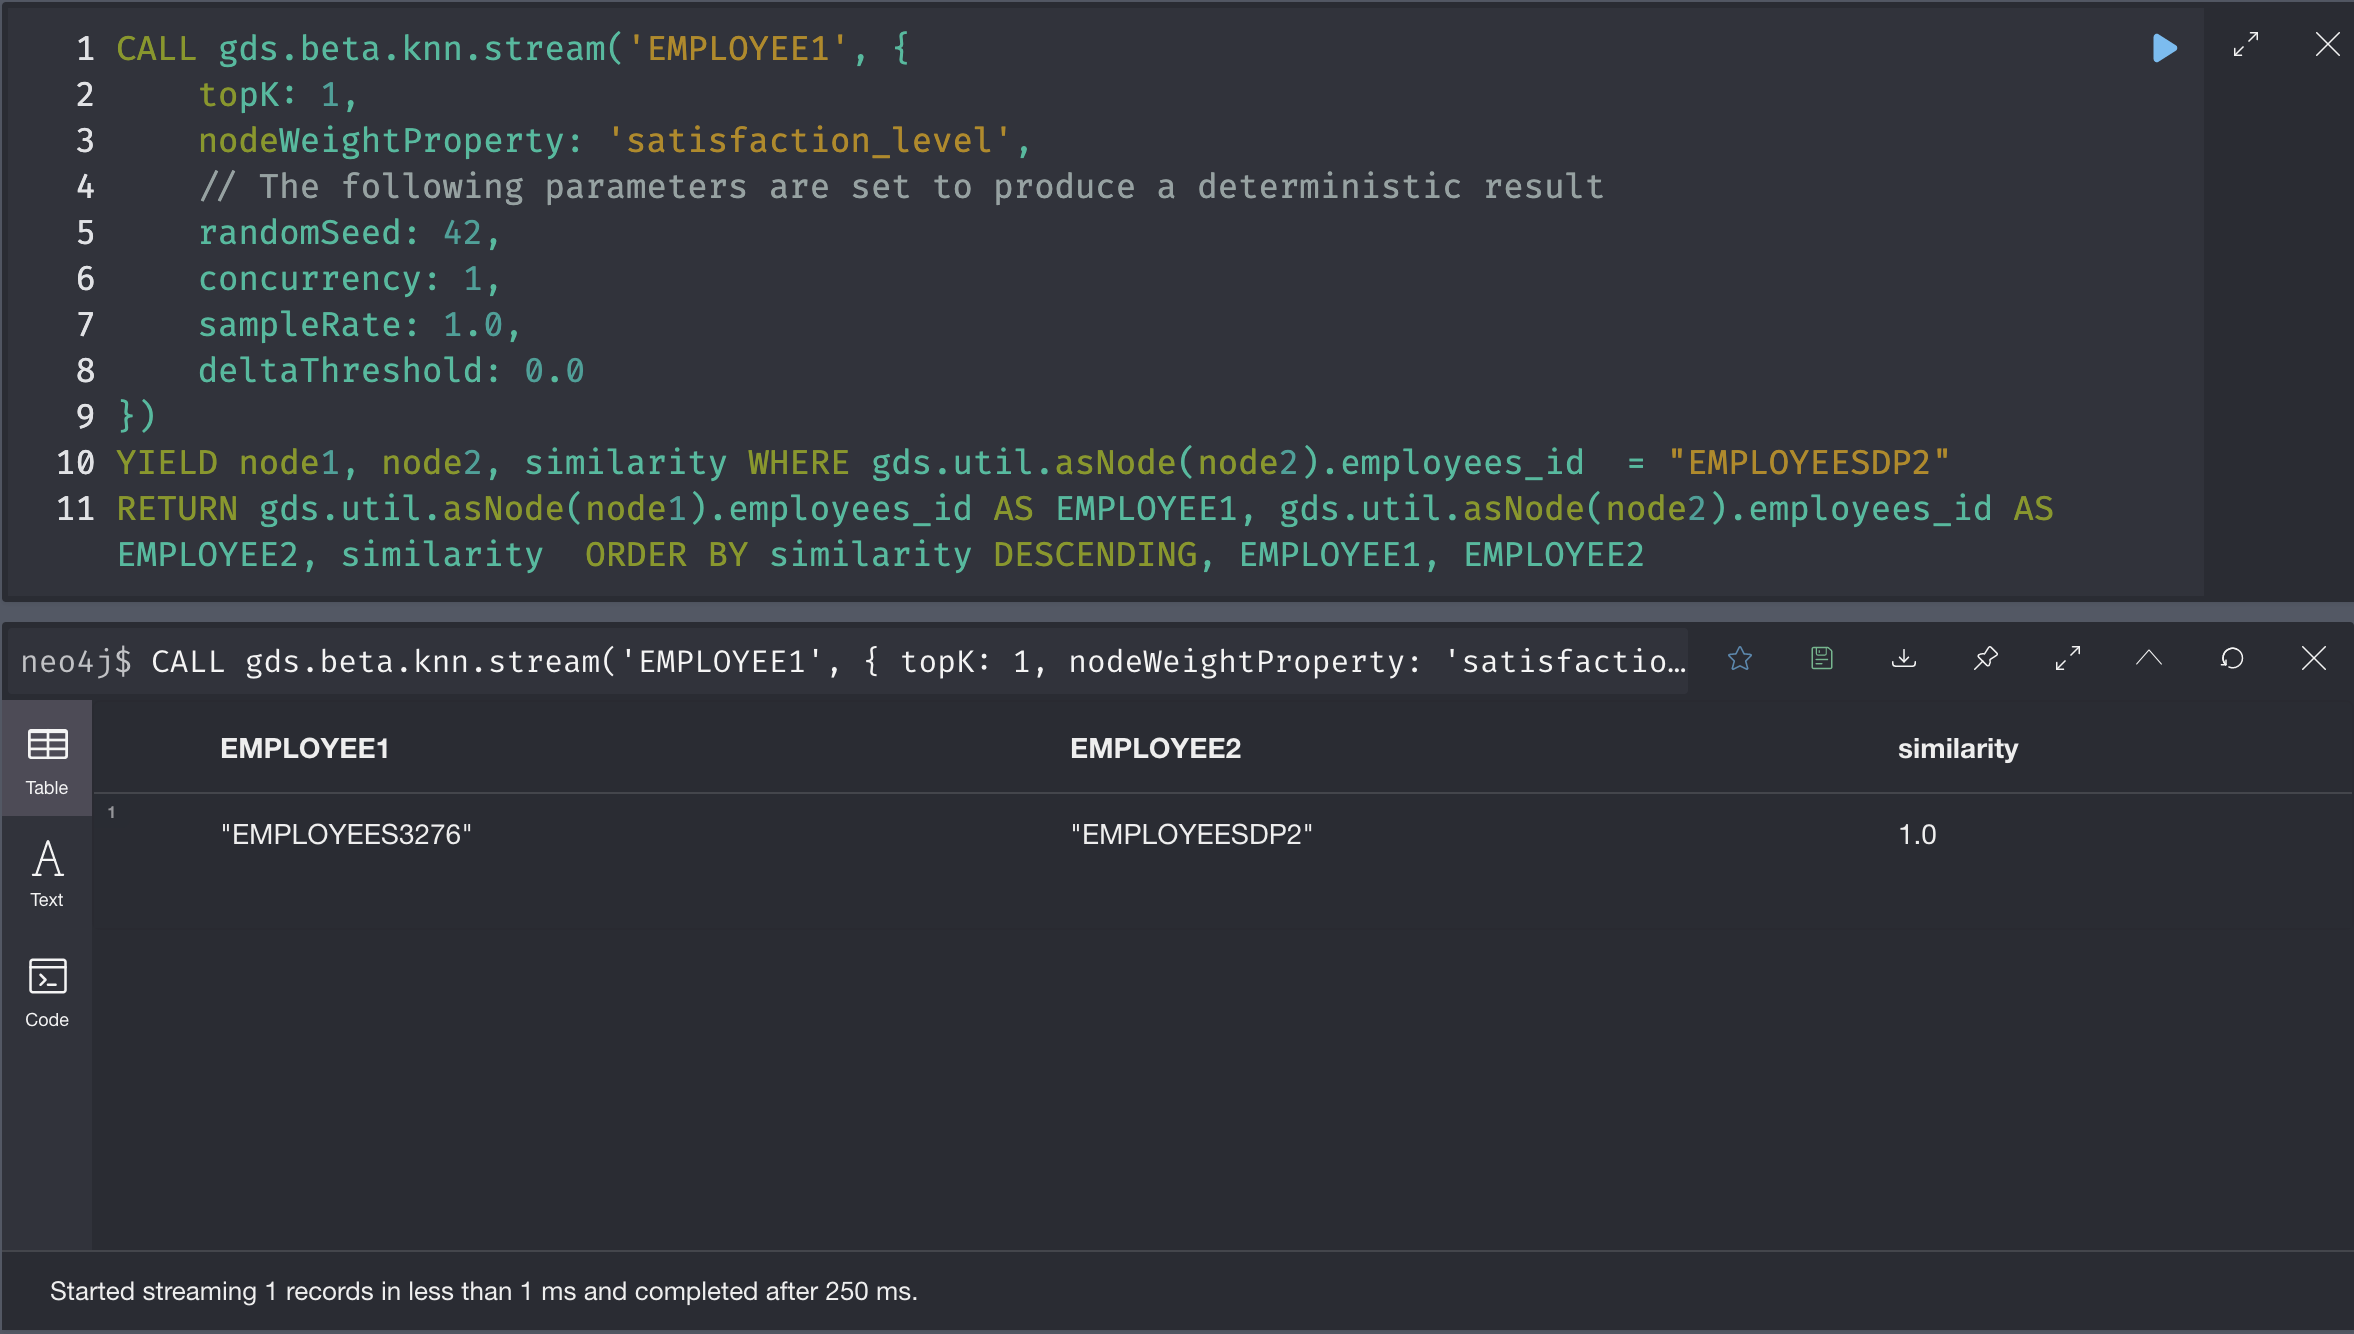

    •	Generar otro entorno en donde solo ingrese el 70% de los datos y validar con el 30%.

In [27]:
print(round(len(lista)*0.7))

10499


# Conexión con Neo4j
    Configure la URL de conexión con la base de datos de Ne04j:
   ### graph = Graph("bolt://localhost:7687", aut="neo4j", password="Prueba2.1", secure=False)   

In [37]:
#IMPORTAR py2neo
from py2neo import Node, Relationship, Graph


# connect to authenticated graph database
graph = Graph("bolt://localhost:7687", aut="neo4j", password="Prueba2.1", secure=False)   

### Ingreso de los datos de data.csv en Neo4j 

In [43]:
employee = str(lista)
employee = employee.replace("[[",'[')
employee = employee.replace("]]",']')
employee = employee.split('], [')
cont = 0

for contu in employee:
    cont = cont+1
    
    data = str(contu)
    data = data.replace("[",'')
    data = data.replace("]",'')
    data = data.replace("'",'')
    data = data.split(', ')
    if(round(len(lista)*0.7)>=cont):
        emplo = "EMPLOYEES70-" + str(cont)
        graph.run("CREATE (EMPLOYEES"+str(cont)+":EMPLOYEES70 {employees_id:'"+emplo+"',satisfaction_level:"+data[0]+","
              +"last_evaluation:"+data[1]+",number_project:"+data[2]+",average_montly_hours:"+data[3]+","
              +"time_spend_company:"+data[4]+",Work_accident:"+data[5]+",promotion_last_5years:"+data[6]+","
              +"left:"+data[7]+"})").data()
        
    else :
        
        emplo1 = "EMPLOYEES30-" + str(cont)
        graph.run("CREATE (EMPLOYEES"+str(cont)+":EMPLOYEES30 {employees_id:'"+emplo1+"',satisfaction_level:"+data[0]+","
              +"last_evaluation:"+data[1]+",number_project:"+data[2]+",average_montly_hours:"+data[3]+","
              +"time_spend_company:"+data[4]+",Work_accident:"+data[5]+",promotion_last_5years:"+data[6]+","
              +"left:"+data[7]+"})").data()
        

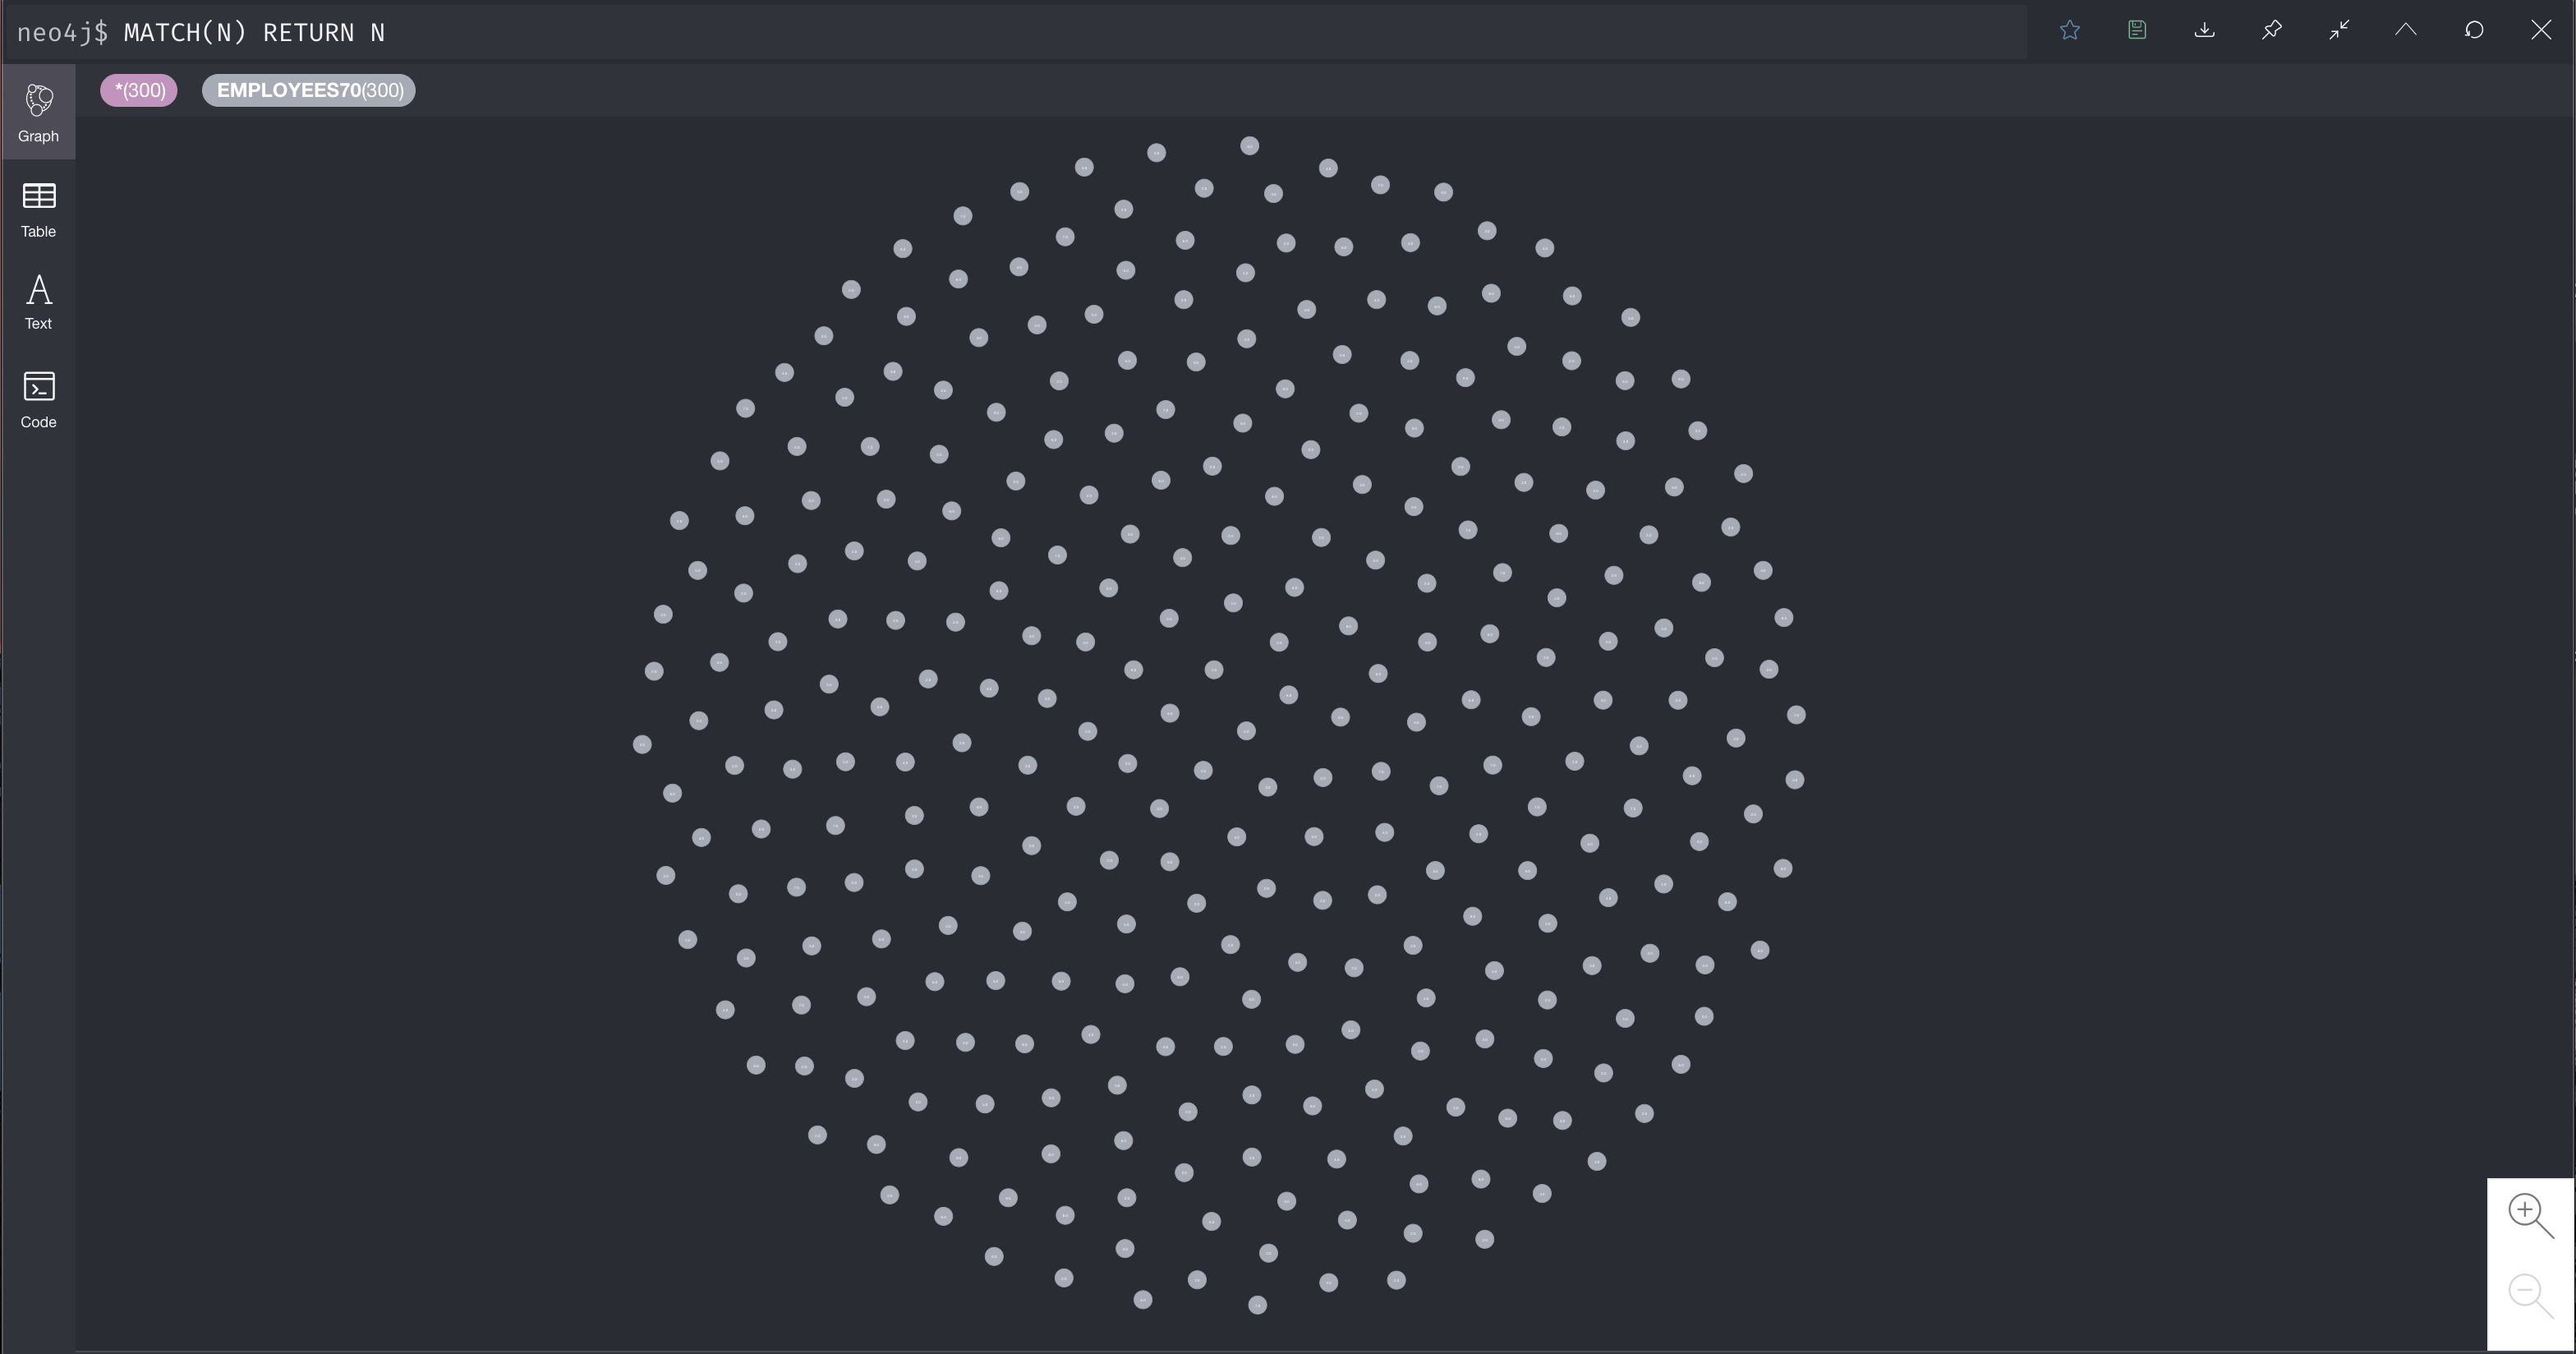


### Comprobar el número de datos ingresados con la siguiente consulta, donde es semilar a longitud de la lista que es de 14999

In [44]:
graph.run("MATCH(n) RETURN COUNT(n)").data()

[{'COUNT(n)': 14999}]

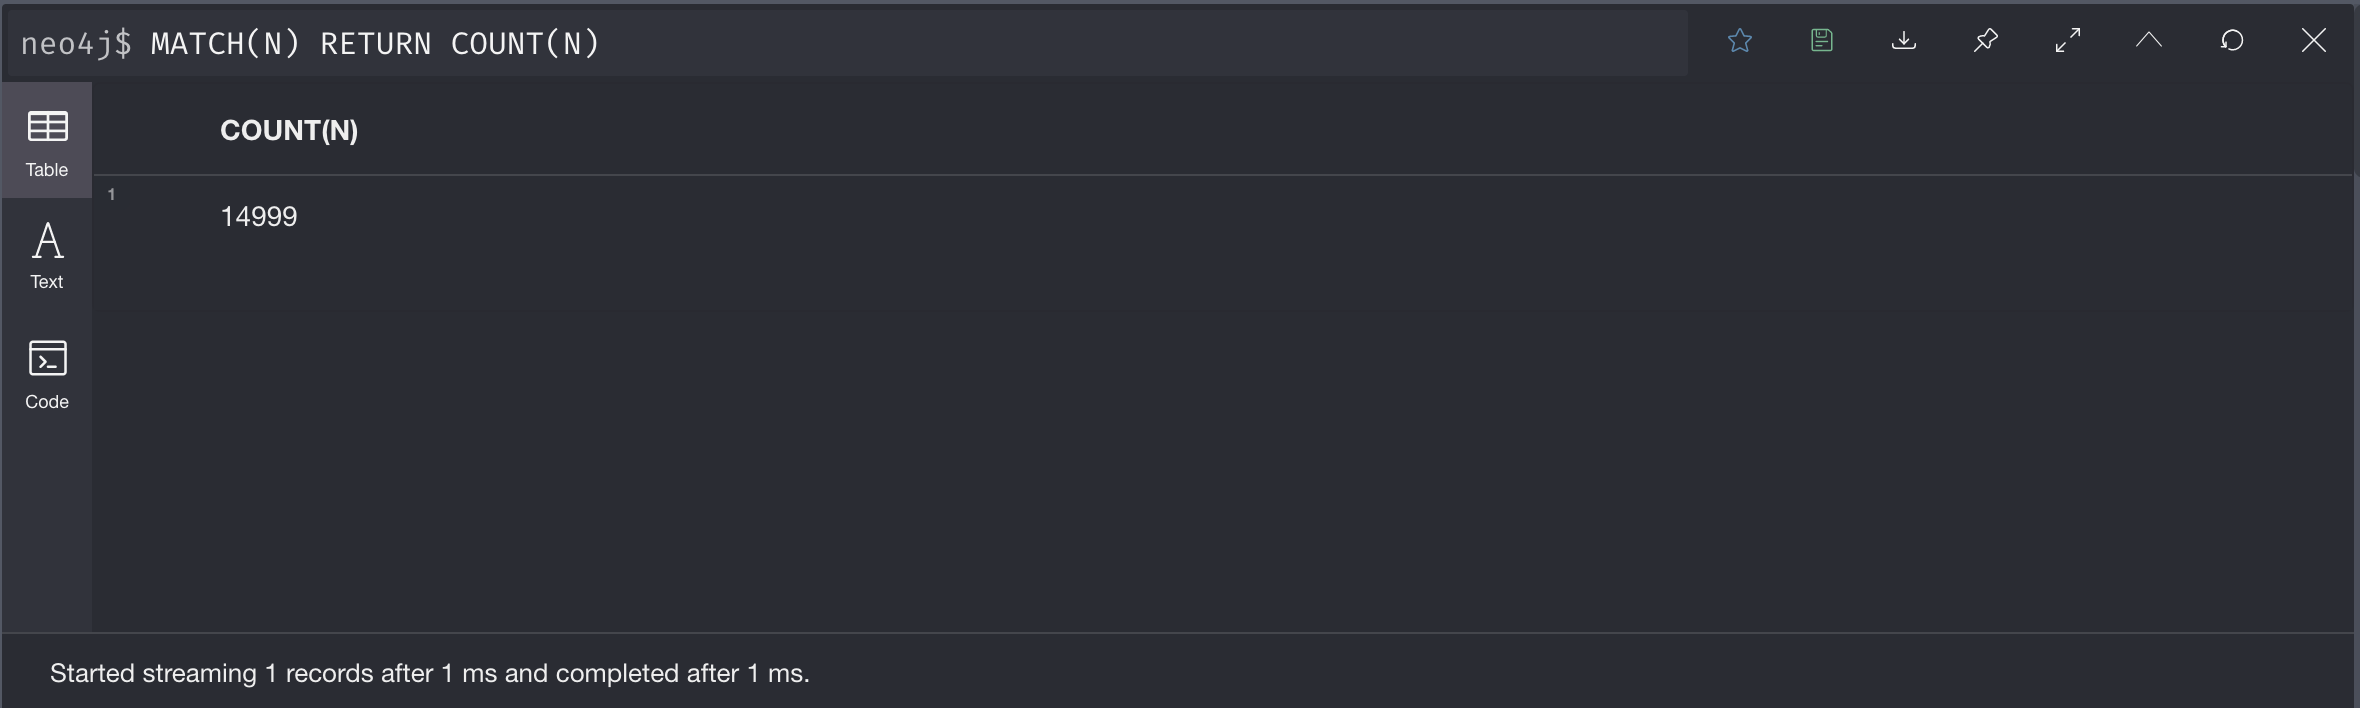

    Crear un gráfico para utilizar una proyección nativa y lo almacenará en el catálogo de gráficos con el 
    nombre 'EMPLOYEE3'. 
    
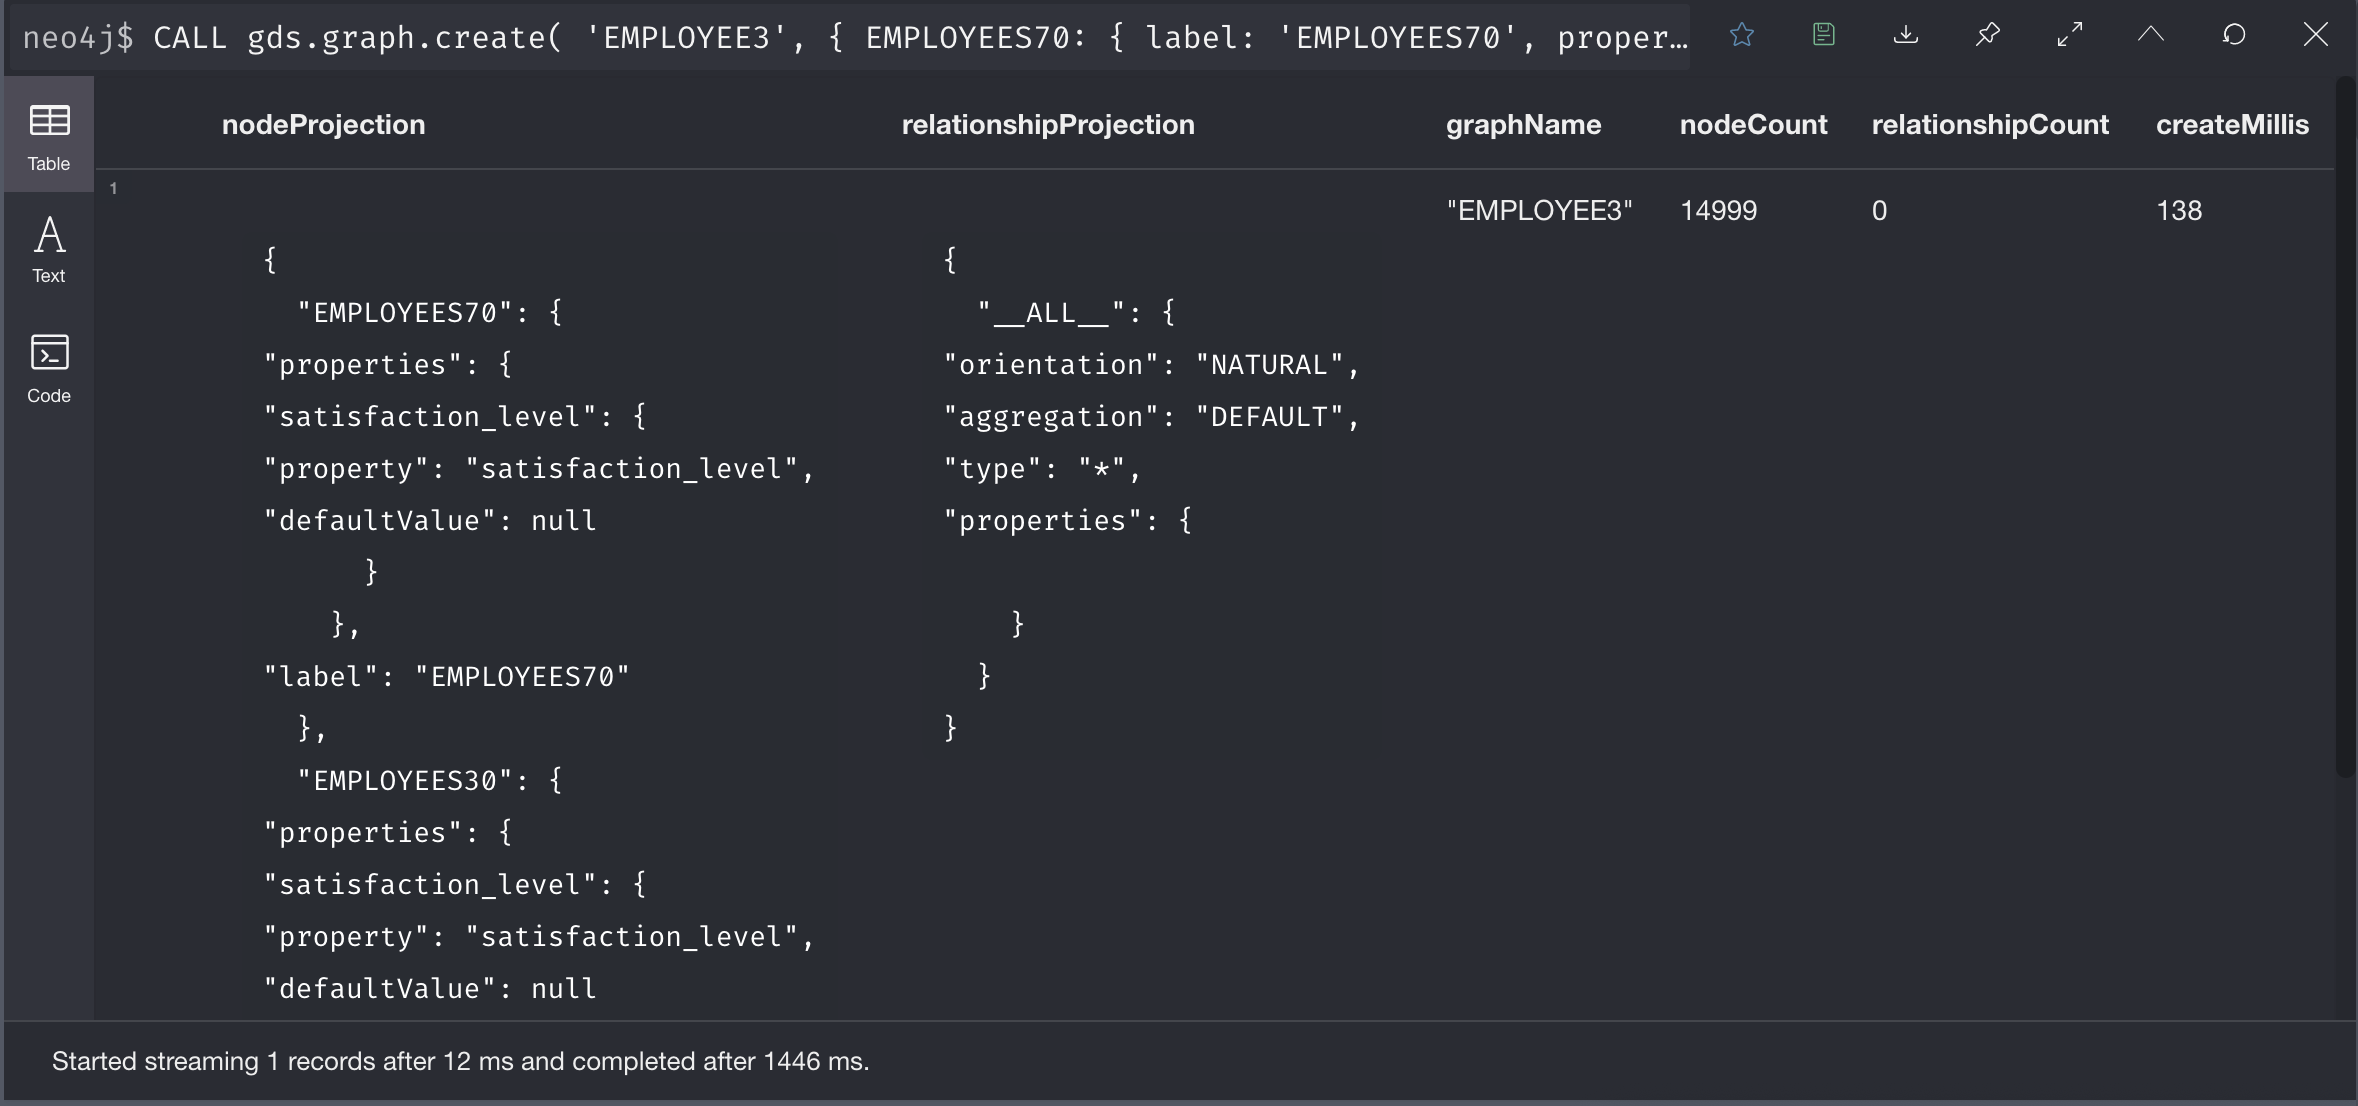

    Estimarán los requisitos de memoria para ejecutar el algoritmo, el algoritmo devuelve la puntuación de 
    similitud para cada relación, lo cual nos devolverá 1000 filas como resultados: 
    
### Resultado de las primeras filas de la primera consulta
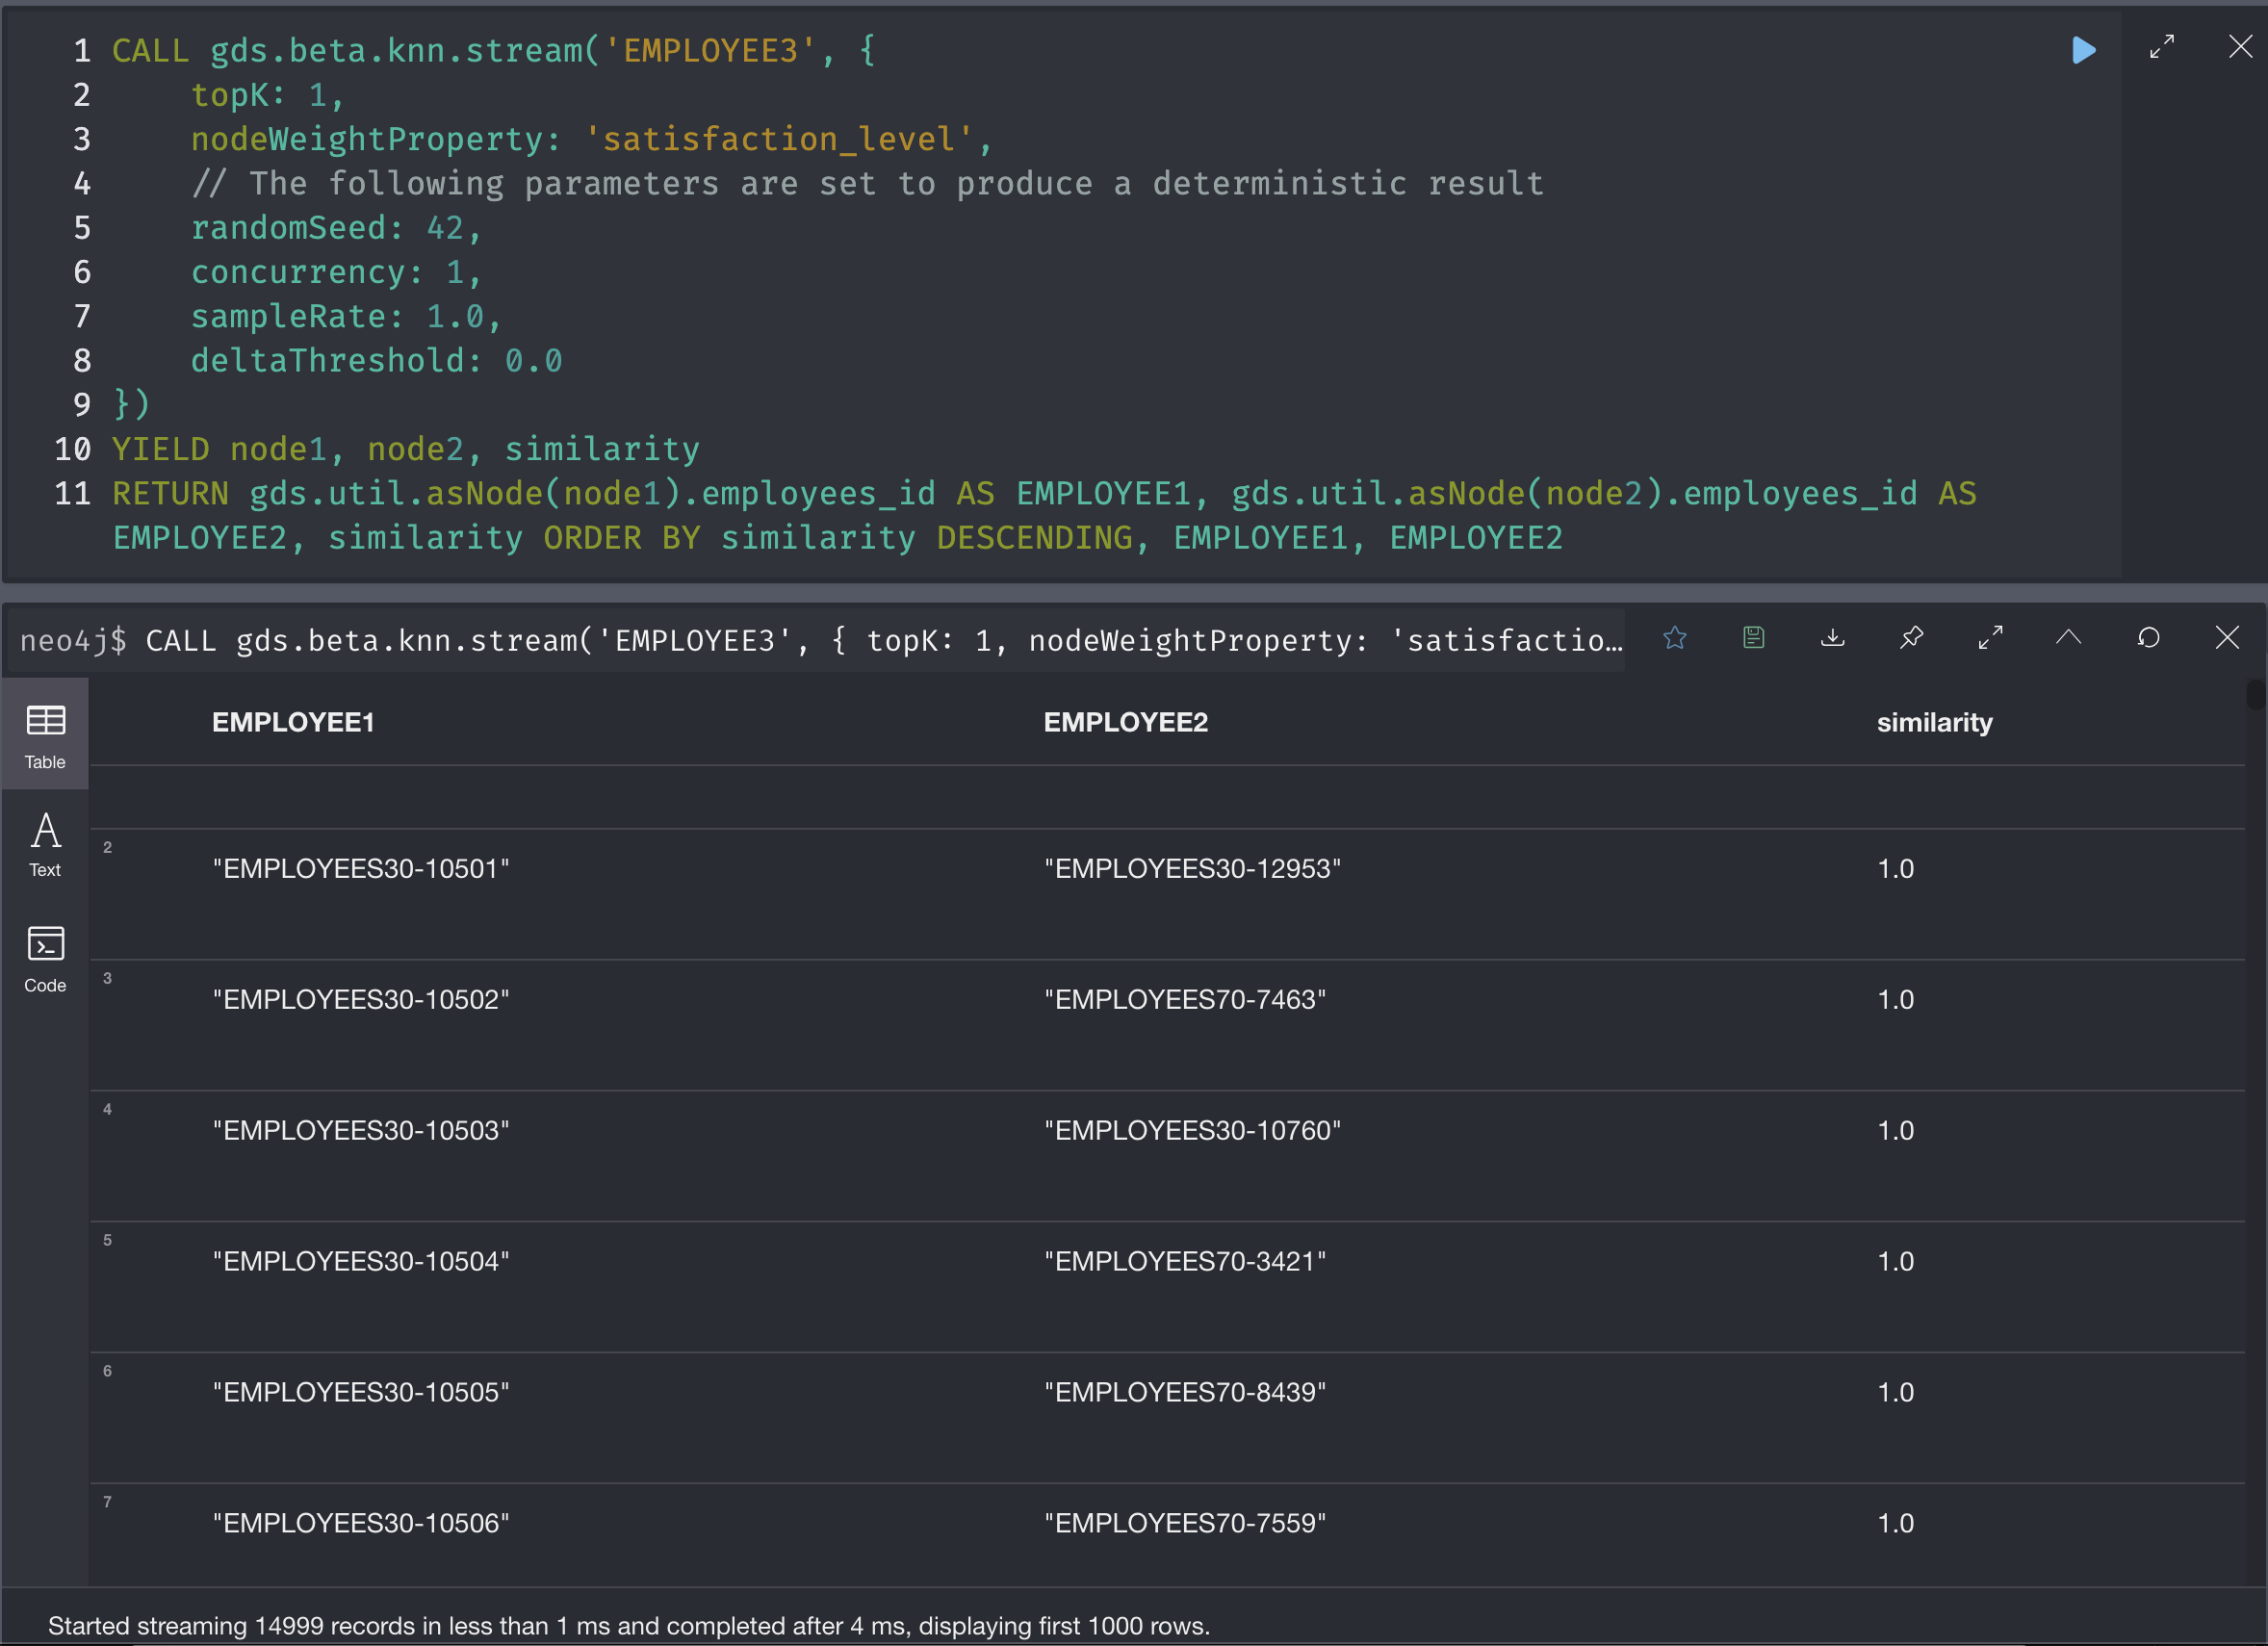

### Resultado de las ultimas filas de la primera consulta
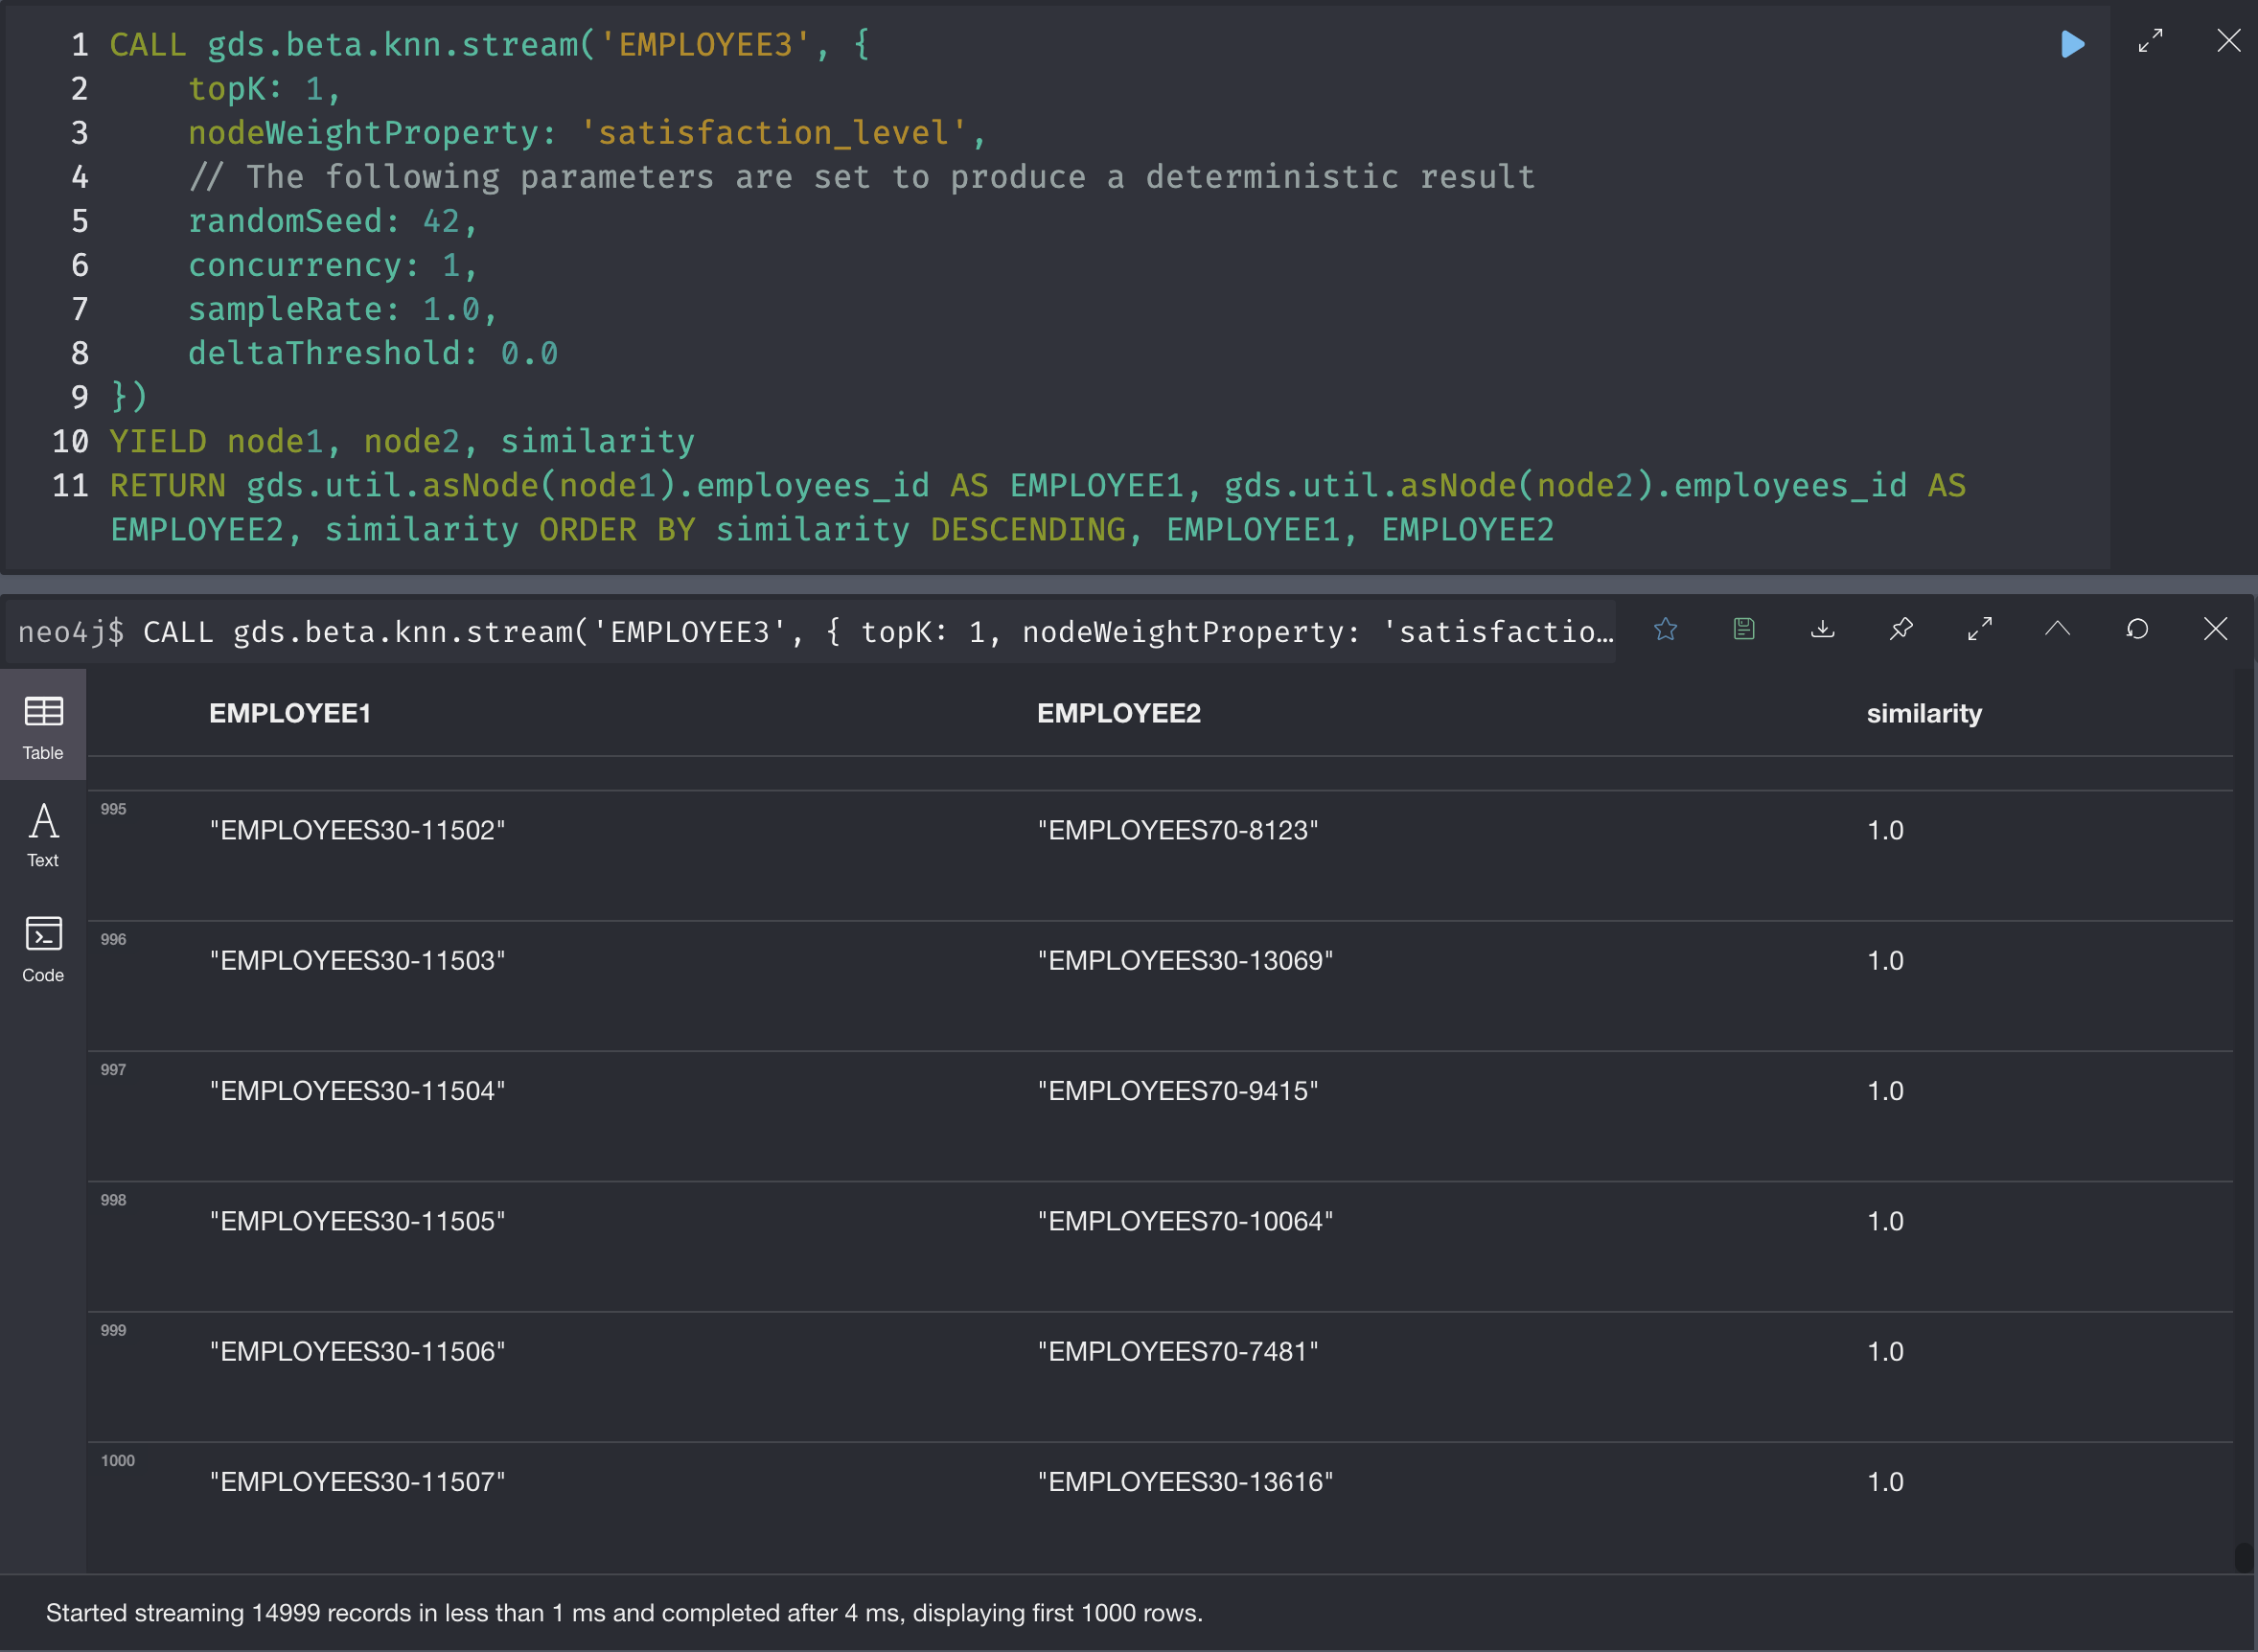
    
### Resultado de las primeras filas de la segunda consulta
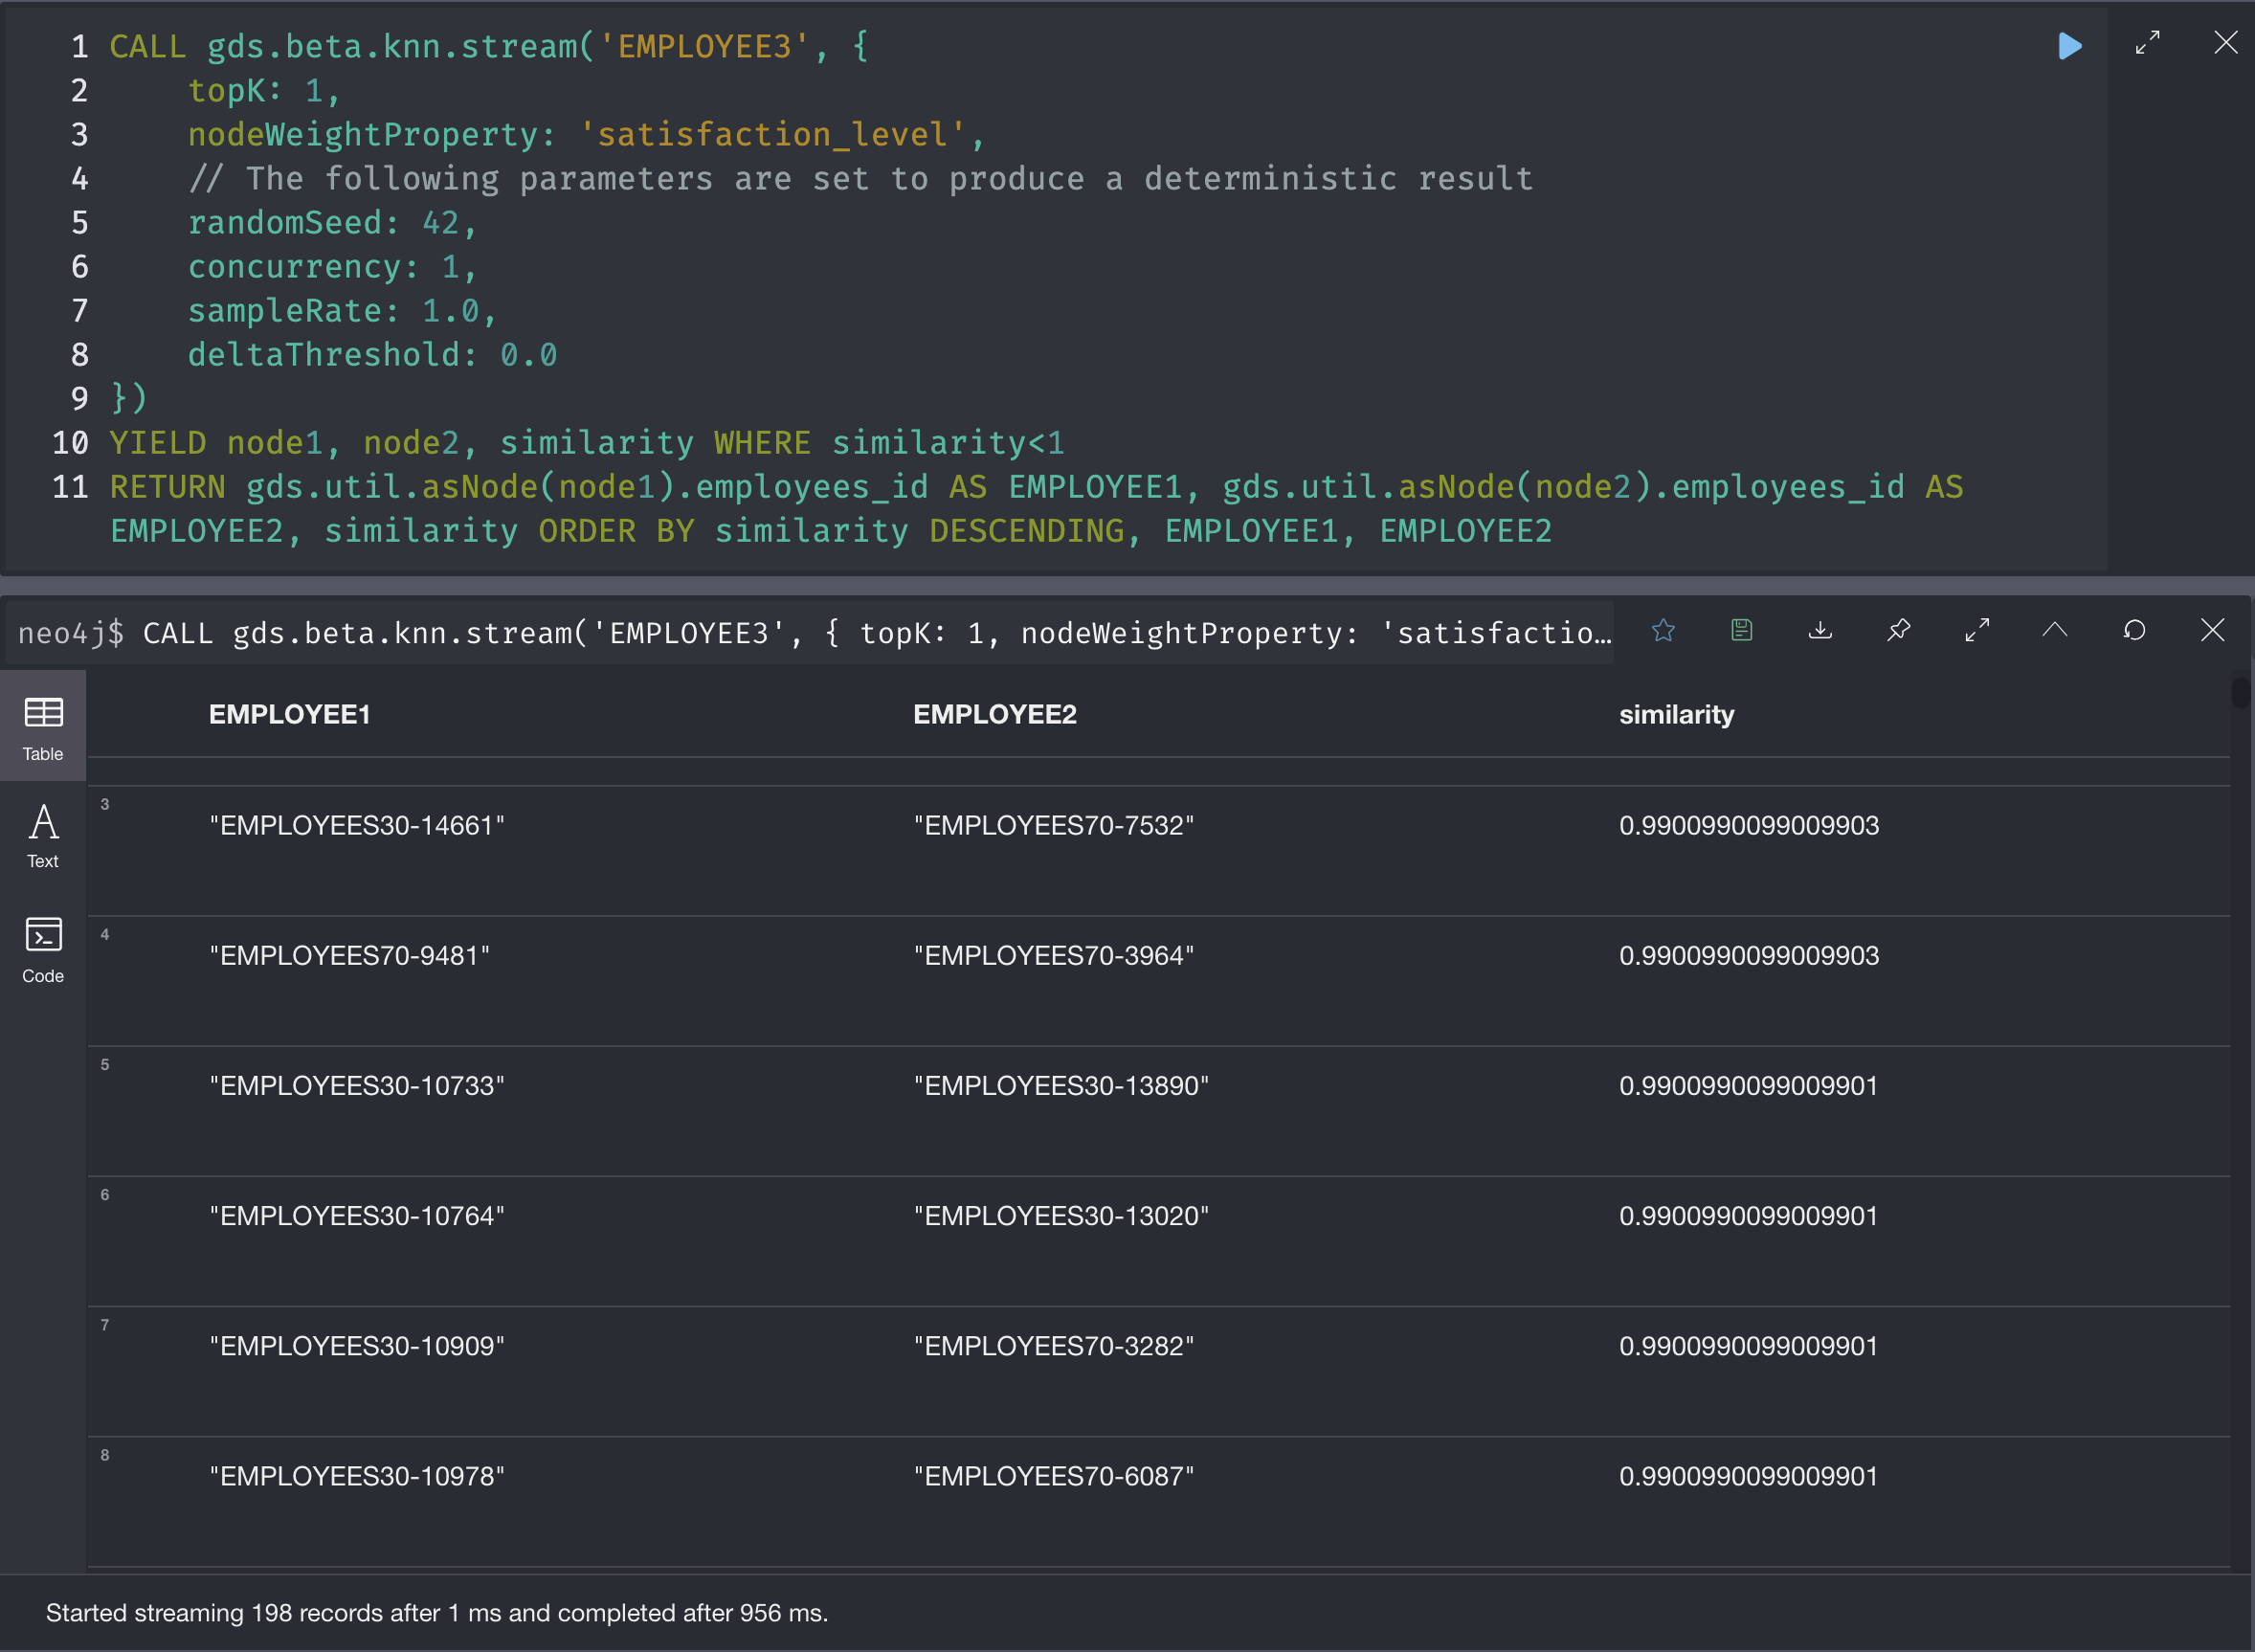

### Resultado de las ultimas filas de la segunda consulta
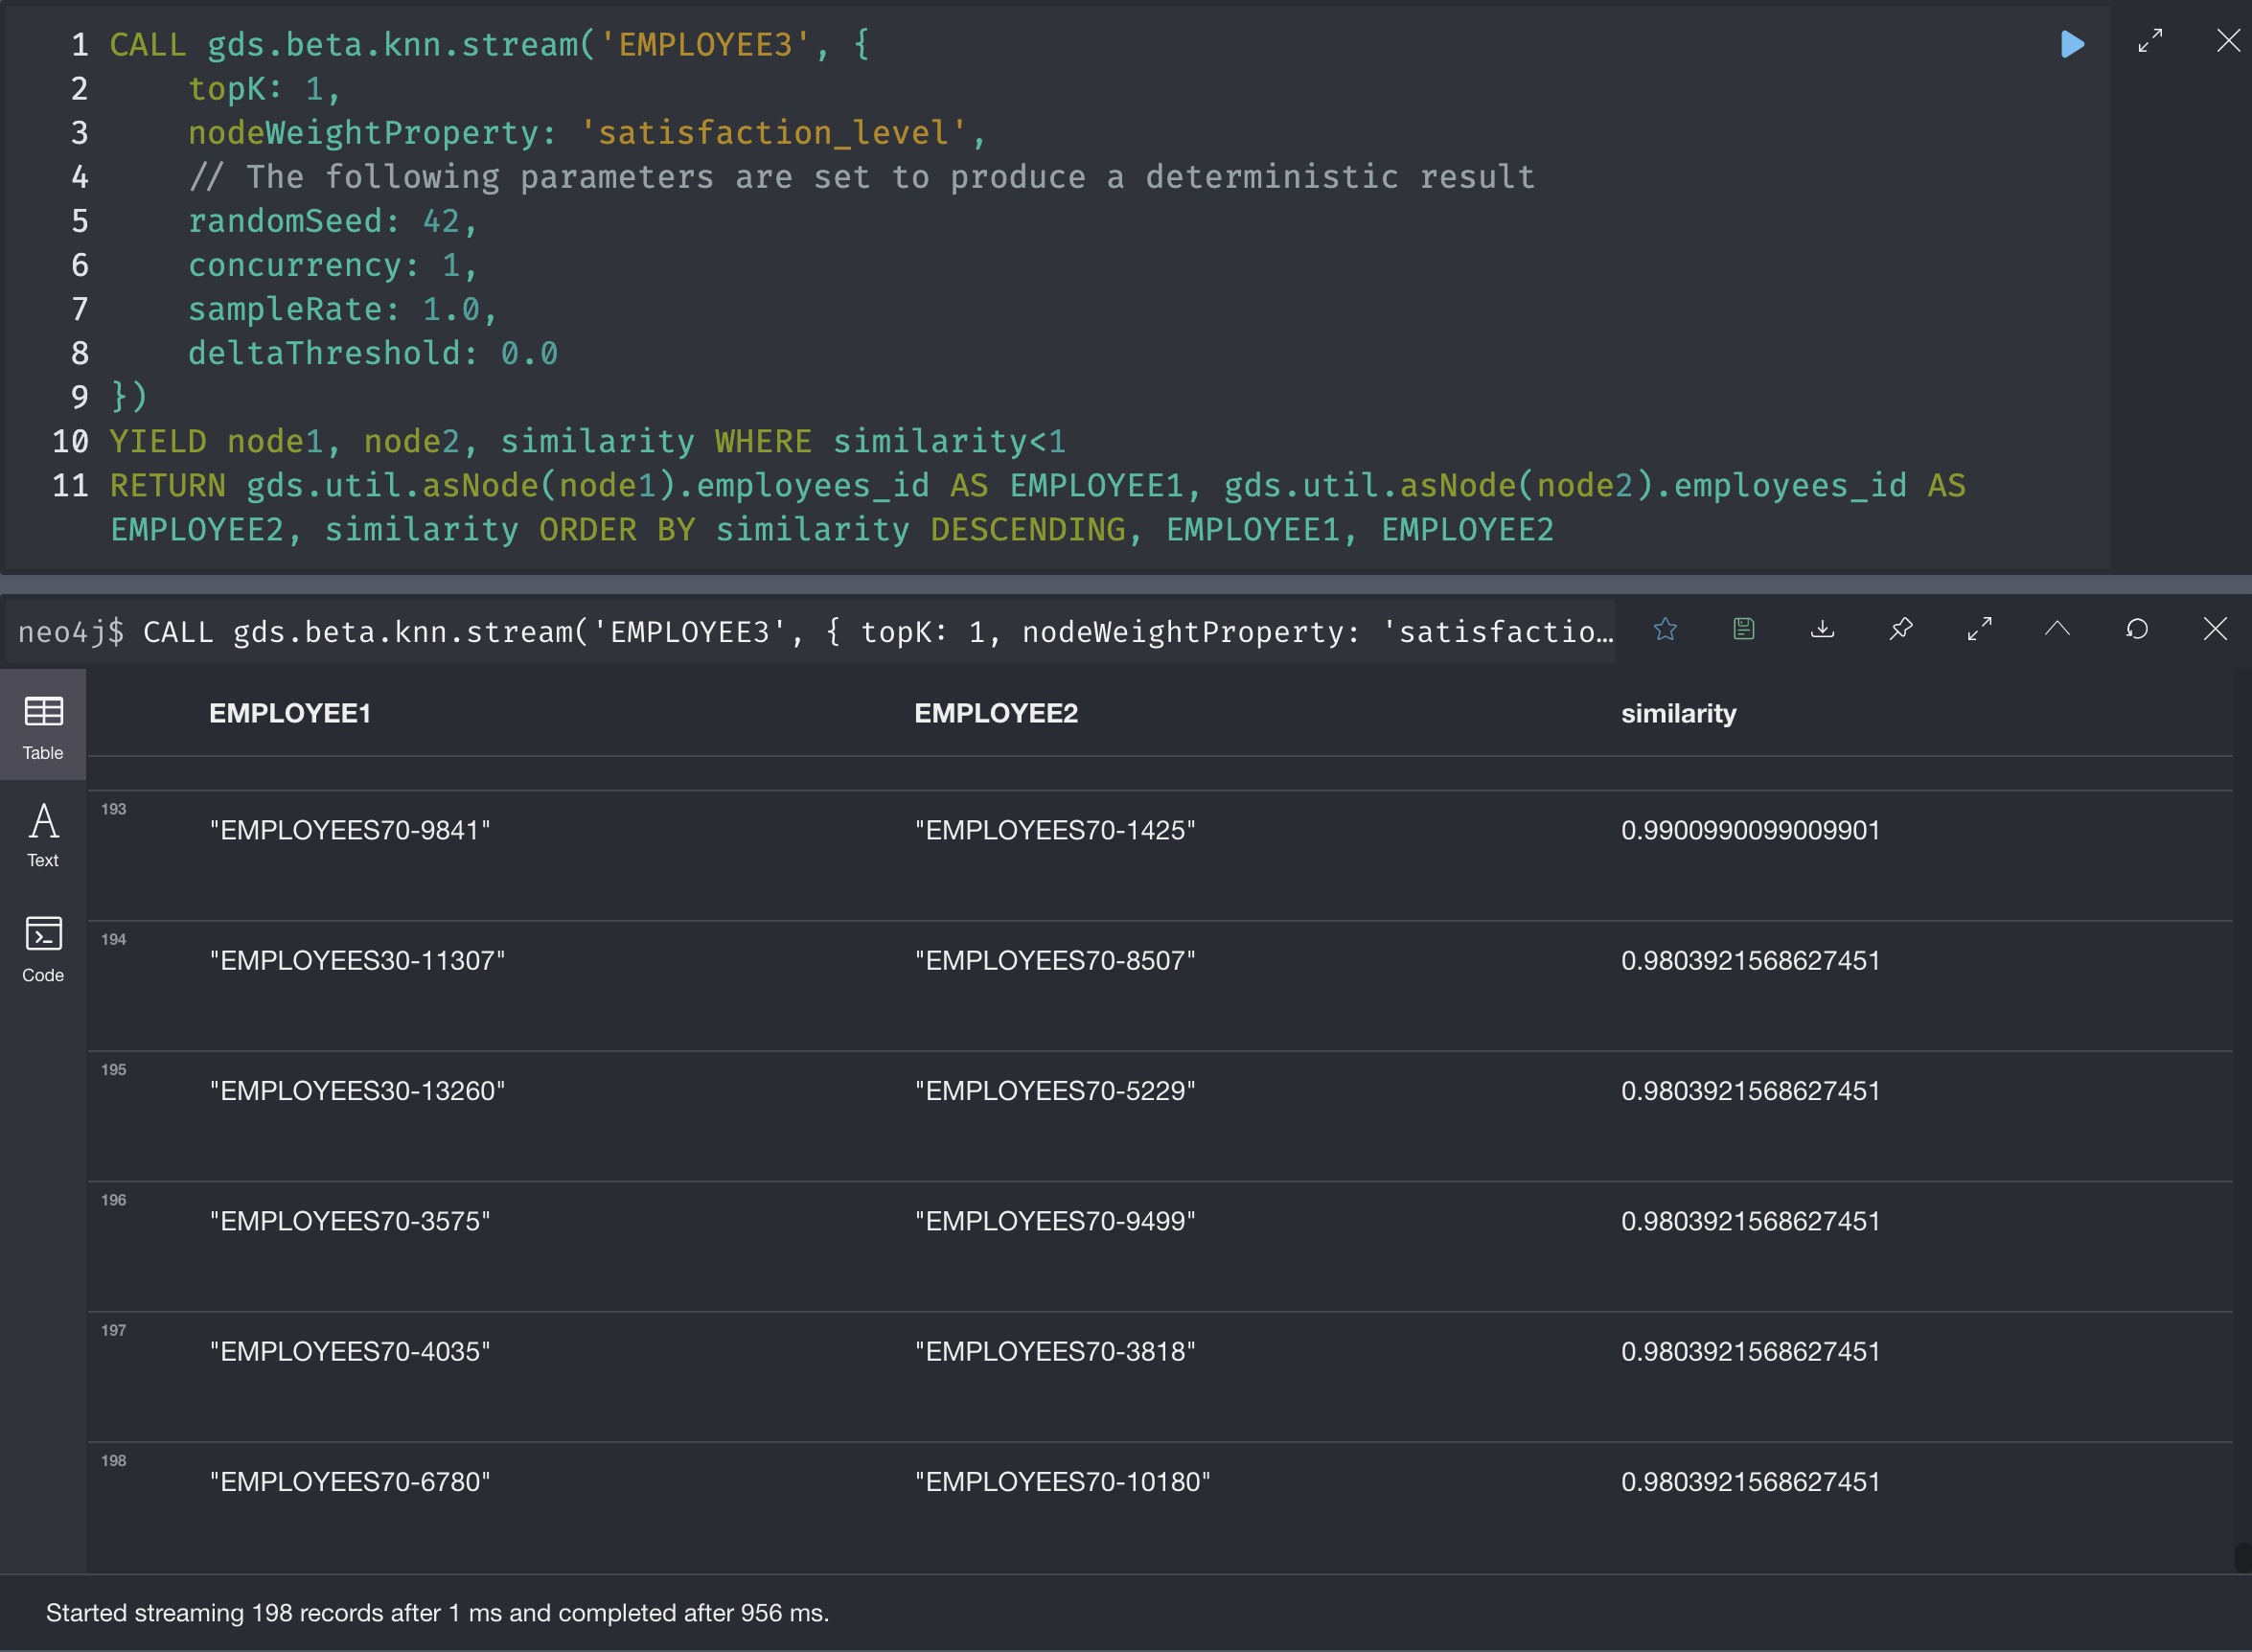